In [1]:
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import math

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [5]:
from boruta import BorutaPy

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.metrics import precision_score

In [11]:
from sklearn.metrics import recall_score

In [12]:
from sklearn.metrics import f1_score

In [13]:
from sklearn.model_selection import cross_validate

In [14]:
output_dir = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE CCLE\\Project Output'
input_dir_gdsc = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE CCLE\\Input\\GDSC TEST' 
input_dir_ccle = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE CCLE\\Input'

In [15]:
output_dir_ccle = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE CCLE\\Project Output'
output_dir_gdsc = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE GDSC'

In [16]:
os.chdir(input_dir_gdsc)

In [17]:
# Hücre hatlarının kanser çeşidini gösteren data
GDSC_tissue_Info = pd.read_excel("GDSC_Cell_Lines_Details.xlsx")

In [18]:
GDSC_tissue_Info = GDSC_tissue_Info.rename(columns = {'Sample Name' : 'Cell Line'})
GDSC_tissue_Info

,Cell Line,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
998,KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN
999,SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN
1000,U-CH2,1503373.0,Y,Y,N,N,N,bone,bone_other,NaN,MSS/MSI-L,D/F12,Adherent


In [19]:
GDSC_tissue_Info['GDSC\nTissue descriptor 1'].unique()

array(['aero_dig_tract', 'leukemia', 'lymphoma', 'myeloma', 'bone',
       'breast', 'digestive_system', 'large_intestine', 'kidney',
       'lung_NSCLC', 'lung', 'lung_SCLC', 'nervous_system',
       'neuroblastoma', 'pancreas', 'skin', 'soft_tissue', 'thyroid',
       'urogenital_system', nan], dtype=object)

In [20]:
len(GDSC_tissue_Info['GDSC\nTissue descriptor 1'].unique())

20

In [21]:
GDSC_tissue_Info['GDSC\nTissue descriptor 1'].replace('lung_NSCLC', 'lung', inplace=True)
GDSC_tissue_Info['GDSC\nTissue descriptor 1'].replace('lung_SCLC', 'lung', inplace=True)

In [22]:
GDSC_tissue_Info['GDSC\nTissue descriptor 1'].unique()

array(['aero_dig_tract', 'leukemia', 'lymphoma', 'myeloma', 'bone',
       'breast', 'digestive_system', 'large_intestine', 'kidney', 'lung',
       'nervous_system', 'neuroblastoma', 'pancreas', 'skin',
       'soft_tissue', 'thyroid', 'urogenital_system', nan], dtype=object)

In [23]:
len(GDSC_tissue_Info['GDSC\nTissue descriptor 1'].unique())

18

In [24]:
len(GDSC_tissue_Info['Cell Line'].unique())

1002

In [25]:
# CCLE

In [26]:
os.chdir(input_dir_ccle)

In [27]:
Annotation_ccle= pd.read_csv("CCLE_expressions.annotations.tsv", sep = "\t")

In [28]:
Annotation_ccle = Annotation_ccle.rename(columns = {'title' : 'Cell Line'})
Annotation_ccle

,GSM,Cell Line,source,primary site,histology,histology subtype1,CCLE_name
0,GSM886835,1321N1,ECACC,central_nervous_system,glioma,astrocytoma,1321N1_CENTRAL_NERVOUS_SYSTEM
1,GSM886836,143B,ATCC,bone,osteosarcoma,NaN,143B_BONE
2,GSM886837,22Rv1,ATCC,prostate,carcinoma,NaN,22RV1_PROSTATE
3,GSM886838,23132/87,DSMZ,stomach,carcinoma,adenocarcinoma,2313287_STOMACH
4,GSM886839,42-MG-BA,DSMZ,central_nervous_system,glioma,astrocytoma_Grade_IV,42MGBA_CENTRAL_NERVOUS_SYSTEM
...,...,...,...,...,...,...,...
910,GSM887747,YH-13,HSRRB,central_nervous_system,glioma,astrocytoma_Grade_IV,YH13_CENTRAL_NERVOUS_SYSTEM
911,GSM887748,YKG1,HSRRB,central_nervous_system,glioma,astrocytoma_Grade_IV,YKG1_CENTRAL_NERVOUS_SYSTEM
912,GSM887749,YMB-1,HSRRB,breast,carcinoma,NaN,YMB1_BREAST
913,GSM887750,ZR-75-1,ATCC,breast,carcinoma,ductal_carcinoma,ZR751_BREAST


In [29]:
Annotation_ccle.columns

Index(['GSM', 'Cell Line', 'source', 'primary site', 'histology',
       'histology subtype1', 'CCLE_name'],
      dtype='object')

In [30]:
len(Annotation_ccle['Cell Line'].unique())

915

In [31]:
#.....

In [32]:
commom_cell_line_ccle_gdsc = set(GDSC_tissue_Info['Cell Line'].unique()).intersection(Annotation_ccle['Cell Line'].unique()) 

In [33]:
commom_cell_line_ccle_gdsc

{'42-MG-BA',
 '639-V',
 '647-V',
 '769-P',
 '8-MG-BA',
 '8305C',
 '8505C',
 'A101D',
 'A172',
 'A2780',
 'A549',
 'ABC-1',
 'ACHN',
 'AGS',
 'AM-38',
 'AMO-1',
 'AU565',
 'AsPC-1',
 'BEN',
 'BFTC-905',
 'BFTC-909',
 'BHT-101',
 'BHY',
 'BL-41',
 'BT-20',
 'BT-474',
 'BT-483',
 'BT-549',
 'BV-173',
 'Becker',
 'BxPC-3',
 'C2BBe1',
 'C32',
 'C3A',
 'CA46',
 'CADO-ES1',
 'CAL-120',
 'CAL-12T',
 'CAL-148',
 'CAL-29',
 'CAL-51',
 'CAL-54',
 'CAL-62',
 'CAL-78',
 'CAL-85-1',
 'CAMA-1',
 'CAS-1',
 'CCF-STTG1',
 'CCK-81',
 'CFPAC-1',
 'CGTH-W-1',
 'CHL-1',
 'CHP-126',
 'CHP-212',
 'CL-11',
 'CL-34',
 'CL-40',
 'CMK',
 'CML-T1',
 'COLO-678',
 'COLO-679',
 'COLO-680N',
 'COLO-783',
 'COLO-800',
 'COR-L105',
 'COR-L23',
 'COR-L311',
 'COR-L88',
 'COR-L95',
 'CPC-N',
 'CW-2',
 'Calu-3',
 'Calu-6',
 'Caov-3',
 'Caov-4',
 'Capan-2',
 'ChaGo-K-1',
 'DAN-G',
 'DB',
 'DBTRG-05MG',
 'DEL',
 'DK-MG',
 'DND-41',
 'DOHH-2',
 'Daoy',
 'Daudi',
 'EB2',
 'EBC-1',
 'EC-GI-10',
 'ECC10',
 'ECC12',
 'EFM-19',
 '

In [34]:
len(commom_cell_line_ccle_gdsc)

512

In [35]:
cell_line_table = dict()
for cell_line in commom_cell_line_ccle_gdsc:
    filter1 = (GDSC_tissue_Info['Cell Line'] == cell_line)
    GDSC_tissue_Info_new = GDSC_tissue_Info.loc[filter1,]
    filter2 = (Annotation_ccle['Cell Line'] == cell_line)
    Annotation_ccle_new = Annotation_ccle.loc[filter2,]
    merged_cell_line = pd.merge(GDSC_tissue_Info_new, Annotation_ccle_new, on = 'Cell Line')
    cell_line_table[cell_line] = merged_cell_line
    All_common_cell_line = pd.concat(cell_line_table)

In [36]:
cell_line_table['COLO-783']

,Cell Line,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties,GSM,source,primary site,histology,histology subtype1,CCLE_name
0,COLO-783,1240125.0,Y,Y,Y,N,Y,skin,melanoma,SKCM,MSS/MSI-L,R,Adherent,GSM886949,DSMZ,skin,malignant_melanoma,NaN,COLO783_SKIN


In [37]:
All_common_cell_line

,,Cell Line,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties,GSM,source,primary site,histology,histology subtype1,CCLE_name
Daoy,0,Daoy,906833.0,Y,Y,Y,Y,Y,nervous_system,medulloblastoma,MB,MSS/MSI-L,D/F12,Adherent,GSM886972,ATCC,central_nervous_system,primitive_neuroectodermal_tumour-medulloblastoma,NaN,DAOY_CENTRAL_NERVOUS_SYSTEM
L-1236,0,L-1236,1330935.0,Y,Y,Y,Y,Y,lymphoma,Hodgkin_lymphoma,NaN,MSS/MSI-L,R,Suspension,GSM887257,DSMZ,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,Hodgkin_lymphoma,L1236_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
SK-MEL-1,0,SK-MEL-1,909723.0,Y,Y,Y,Y,Y,skin,melanoma,SKCM,MSS/MSI-L,D/F12,Suspension,GSM887582,ATCC,skin,malignant_melanoma,NaN,SKMEL1_SKIN
NCI-H1693,0,NCI-H1693,687802.0,Y,Y,Y,Y,Y,lung,lung_NSCLC_adenocarcinoma,LUAD,MSS/MSI-L,R,Adherent,GSM887376,ATCC,lung,carcinoma,adenocarcinoma,NCIH1693_LUNG
MONO-MAC-6,0,MONO-MAC-6,908148.0,Y,Y,Y,Y,Y,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,R,Suspension,GSM887338,DSMZ,haematopoietic_and_lymphoid_tissue,haematopoietic_neoplasm,acute_myeloid_leukaemia,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MFE-296,0,MFE-296,908130.0,Y,Y,Y,Y,Y,urogenital_system,endometrium,UCEC,MSI-H,D/F12,Adherent,GSM887312,DSMZ,endometrium,carcinoma,adenocarcinoma,MFE296_ENDOMETRIUM
HCC1419,0,HCC1419,907045.0,Y,Y,Y,Y,Y,breast,breast,BRCA,MSS/MSI-L,R,Adherent,GSM887038,ATCC,breast,carcinoma,ductal_carcinoma,HCC1419_BREAST
SK-LMS-1,0,SK-LMS-1,909720.0,Y,Y,Y,Y,Y,soft_tissue,soft_tissue_other,NaN,MSS/MSI-L,D/F12,Adherent,GSM887579,ATCC,soft_tissue,sarcoma,NaN,SKLMS1_SOFT_TISSUE
KU812,0,KU812,907311.0,Y,Y,Y,Y,Y,leukemia,chronic_myeloid_leukaemia,LCML,MSS/MSI-L,R,Suspension,GSM887244,ATCC,haematopoietic_and_lymphoid_tissue,haematopoietic_neoplasm,chronic_myeloid_leukaemia,KU812_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE


In [38]:
#............

In [39]:
Annotation_ccle_histology = Annotation_ccle['histology'].unique()

In [40]:
Annotation_ccle_histology

array(['glioma', 'osteosarcoma', 'carcinoma', 'haematopoietic_neoplasm',
       'malignant_melanoma', 'rhabdomyosarcoma', 'lymphoid_neoplasm',
       'Ewings_sarcoma-peripheral_primitive_neuroectodermal_tumour',
       'mesothelioma', 'chondrosarcoma', 'neuroblastoma',
       'sex_cord-stromal_tumour',
       'primitive_neuroectodermal_tumour-medulloblastoma',
       'rhabdoid_tumour',
       'malignant_fibrous_histiocytoma-pleomorphic_sarcoma',
       'giant_cell_tumour', 'other', 'fibrosarcoma',
       'carcinoid-endocrine_tumour', 'leiomyosarcoma', 'sarcoma'],
      dtype=object)

In [41]:
All_common_cell_line_descriptor = All_common_cell_line['GDSC\nTissue descriptor 1'].unique()

In [42]:
All_common_cell_line_descriptor

array(['nervous_system', 'lymphoma', 'skin', 'lung', 'leukemia',
       'urogenital_system', 'large_intestine', 'breast',
       'digestive_system', 'aero_dig_tract', 'bone', 'myeloma', 'thyroid',
       'neuroblastoma', 'pancreas', 'soft_tissue', 'kidney'], dtype=object)

In [43]:
len(All_common_cell_line_descriptor)

17

In [44]:
# Reading of Drug Data_CCLE

In [45]:
os.chdir(input_dir_ccle)

In [46]:
ccle_drug_data = pd.read_csv("CCLE_NP24.2009_Drug_data_2015.02.24.csv",
                            sep = ",")

In [47]:
ccle_drug_data.head()

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),Amax,ActArea
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.67,11.0,2.16,.27,-10,-13,-26,-43","3.31,3.72,5.36,4.67,13.1,.18,2.42,7.51",8,Sigmoid,8.717774,8.000000,-42.558014,0.7124
1,22RV1_PROSTATE,22Rv1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8",".94,12.5,-14,4.16,-25,-32,-52,-71","1.95,13.3,6.98,21.8,16.0,18.8,4.84,7.93",8,Sigmoid,8.165164,2.329924,-71.589340,1.6723
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63","13.7,7.70,11.1,6.43,24.0,9.57,9.57,10.4",8,Sigmoid,1.514508,2.682130,-63.491371,1.1852
3,5637_URINARY_TRACT,5637,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.15,9.91,-3.5,.056,-2.1,-14,-30,-62","4.05,9.75,12.7,4.36,11.0,10.0,24.6,.14",8,Sigmoid,8.006595,5.002314,-62.352776,0.9948
4,639V_URINARY_TRACT,639-V,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","11.8,-7.3,-9.4,-15,-11,-21,-53,-50",".95,5.67,11.1,.68,31.6,22.3,1.45,3.08",8,Sigmoid,0.931196,1.736181,-51.959808,1.5436


In [48]:
ccle_drug_data = ccle_drug_data.rename(columns = {'Primary Cell Line Name':'Cell Line'})
ccle_drug_data = ccle_drug_data.rename(columns = {'Compound':'Drug'})
ccle_drug_data = ccle_drug_data.rename(columns = {'ActArea':'Activity Area'})

In [49]:
ccle_drug_data.head(3)

,CCLE Cell Line Name,Cell Line,Drug,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),Amax,Activity Area
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.67,11.0,2.16,.27,-10,-13,-26,-43","3.31,3.72,5.36,4.67,13.1,.18,2.42,7.51",8,Sigmoid,8.717774,8.000000,-42.558014,0.7124
1,22RV1_PROSTATE,22Rv1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8",".94,12.5,-14,4.16,-25,-32,-52,-71","1.95,13.3,6.98,21.8,16.0,18.8,4.84,7.93",8,Sigmoid,8.165164,2.329924,-71.589340,1.6723
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63","13.7,7.70,11.1,6.43,24.0,9.57,9.57,10.4",8,Sigmoid,1.514508,2.682130,-63.491371,1.1852


In [50]:
ccle_drug_data['Drug'].unique()

array(['AEW541', 'Nilotinib', '17-AAG', 'PHA-665752', 'Lapatinib',
       'Nutlin-3', 'AZD0530', 'PF2341066', 'L-685458', 'ZD-6474',
       'Panobinostat', 'Sorafenib', 'Irinotecan', 'Topotecan', 'LBW242',
       'PD-0325901', 'PD-0332991', 'Paclitaxel', 'AZD6244', 'PLX4720',
       'RAF265', 'TAE684', 'TKI258', 'Erlotinib'], dtype=object)

In [51]:
ccle_drug_data['Drug'].replace('PF2341066', 'Crizotinib', inplace=True)
ccle_drug_data['Drug'].replace('TAE684', 'NVP-TAE684', inplace=True)
ccle_drug_data['Drug'].replace('AZD0530', 'AZD-0530', inplace=True)
ccle_drug_data['Drug'].replace('Nutlin-3', 'Nutlin-3a', inplace=True)

In [52]:
ccle_drug_data['Drug'].unique()

array(['AEW541', 'Nilotinib', '17-AAG', 'PHA-665752', 'Lapatinib',
       'Nutlin-3a', 'AZD-0530', 'Crizotinib', 'L-685458', 'ZD-6474',
       'Panobinostat', 'Sorafenib', 'Irinotecan', 'Topotecan', 'LBW242',
       'PD-0325901', 'PD-0332991', 'Paclitaxel', 'AZD6244', 'PLX4720',
       'RAF265', 'NVP-TAE684', 'TKI258', 'Erlotinib'], dtype=object)

In [53]:
len(ccle_drug_data)

11670

In [54]:
# GDSC & CCLE’ deki ortak 15 anti-kanser ilaç

In [55]:
os.chdir(input_dir_gdsc)

In [56]:
Common_drugs = pd.read_excel("TableS4F.xlsx")

In [57]:
Common_drugs

,Unnamed: 0,TableS4F - Set of overlapping compounds across GDSC1000 and CCLE screenings,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Legend,NaN,NaN,NaN
2,NaN,GDSC1000 ids,Compound identifiers used in the GDSC1000 scre...,NaN,NaN
3,NaN,GDSC1000 name,Compound name used in the GDSC1000 screening,NaN,NaN
4,NaN,CCLE name,Compound name used in the CCLE panel (as repor...,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,GDSC1000 drug ids,NaN,GDSC name,CCLE name
9,NaN,1,NaN,Erlotinib,Erlotinib


In [58]:
Common_drugs_new = Common_drugs.iloc[9:,3:]

In [59]:
Common_drugs_new

,Unnamed: 3,Unnamed: 4
9,Erlotinib,Erlotinib
10,PHA-665752,PHA-665752
11,Paclitaxel,Paclitaxel
12,Sorafenib,Sorafenib
13,NVP-TAE684,NVP-TAE684
14,Crizotinib,Crizotinib
15,AZD-0530,AZD-0530
16,Lapatinib,Lapatinib
17,Nilotinib,Nilotinib
18,17-AAG,17-AAG


In [60]:
col_names = ['GDSC_Name','CCLE_Name']
Common_drugs_new.columns = col_names

In [61]:
Common_drugs_new

,GDSC_Name,CCLE_Name
9,Erlotinib,Erlotinib
10,PHA-665752,PHA-665752
11,Paclitaxel,Paclitaxel
12,Sorafenib,Sorafenib
13,NVP-TAE684,NVP-TAE684
14,Crizotinib,Crizotinib
15,AZD-0530,AZD-0530
16,Lapatinib,Lapatinib
17,Nilotinib,Nilotinib
18,17-AAG,17-AAG


In [62]:
Common_drugs_new['CCLE_Name'].replace('Nutlin-3', 'Nutlin-3a', inplace=True)

In [63]:
Common_drugs_new

,GDSC_Name,CCLE_Name
9,Erlotinib,Erlotinib
10,PHA-665752,PHA-665752
11,Paclitaxel,Paclitaxel
12,Sorafenib,Sorafenib
13,NVP-TAE684,NVP-TAE684
14,Crizotinib,Crizotinib
15,AZD-0530,AZD-0530
16,Lapatinib,Lapatinib
17,Nilotinib,Nilotinib
18,17-AAG,17-AAG


In [64]:
Common_drugs1 = Common_drugs_new.iloc[:,0]

In [65]:
Common_drugs1

9      Erlotinib
10    PHA-665752
11    Paclitaxel
12     Sorafenib
13    NVP-TAE684
14    Crizotinib
15      AZD-0530
16     Lapatinib
17     Nilotinib
18        17-AAG
19       PLX4720
20    PD-0332991
21    PD-0325901
22       AZD6244
23     Nutlin-3a
Name: GDSC_Name, dtype: object

In [66]:
#Anti-kanser ilaç datası (GDSC):

In [67]:
os.chdir(input_dir_gdsc)

In [68]:
GDSC_Drugs_Data = pd.read_excel("TableS5C.xlsx") 

In [69]:
GDSC_Drugs_Data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266
0,NaN,"TableS5C - Binarized Drug IC50s, refers to fig...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,(S)ensitive,NaN,(R)esistant,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Screened Compounds:,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,NaN,TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,NaN,NaN,R,NaN,NaN,NaN,NaN,
1003,NaN,KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,S,S,S,R,R
1004,NaN,KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1005,NaN,SC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [70]:
GDSC_Drugs_Data_2 = GDSC_Drugs_Data.iloc[4:,1:]

In [71]:
GDSC_Drugs_Data_2
# Buradan ortak ileçları çekmem lazım

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266
4,Screened Compounds:,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
5,Discretisation \nThreshold (log IC50)/\nCell-L...,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,0.61159,...,4.6302,2.1291,0.18957,-6.559,2.354,-0.22378,3.5949,-0.30417,-0.76788,-1.8842
6,A253,S,R,R,R,R,R,R,R,R,...,S,R,S,R,R,R,R,R,R,R
7,BB30-HNC,S,R,R,R,R,S,S,R,R,...,R,S,S,R,S,S,R,NaN,NaN,
8,BB49-HNC,R,R,R,R,R,R,R,S,R,...,R,R,R,R,R,S,R,S,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,NaN,NaN,R,NaN,NaN,NaN,NaN,
1003,KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,S,S,S,R,R
1004,KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1005,SC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [72]:
selected_row_index = 0
selected_row = GDSC_Drugs_Data_2.iloc[selected_row_index]
GDSC_Drugs_Data_2.columns = selected_row

In [73]:
GDSC_Drugs_Data_2

4,Screened Compounds:,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
4,Screened Compounds:,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
5,Discretisation \nThreshold (log IC50)/\nCell-L...,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,0.61159,...,4.6302,2.1291,0.18957,-6.559,2.354,-0.22378,3.5949,-0.30417,-0.76788,-1.8842
6,A253,S,R,R,R,R,R,R,R,R,...,S,R,S,R,R,R,R,R,R,R
7,BB30-HNC,S,R,R,R,R,S,S,R,R,...,R,S,S,R,S,S,R,NaN,NaN,
8,BB49-HNC,R,R,R,R,R,R,R,S,R,...,R,R,R,R,R,S,R,S,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,NaN,NaN,R,NaN,NaN,NaN,NaN,
1003,KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,S,S,S,R,R
1004,KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1005,SC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [74]:
GDSC_Drugs_Data_2_new = GDSC_Drugs_Data_2.drop(4, axis = 0)

In [75]:
GDSC_Drugs_Data_2_new

4,Screened Compounds:,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
5,Discretisation \nThreshold (log IC50)/\nCell-L...,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,0.61159,...,4.6302,2.1291,0.18957,-6.559,2.354,-0.22378,3.5949,-0.30417,-0.76788,-1.8842
6,A253,S,R,R,R,R,R,R,R,R,...,S,R,S,R,R,R,R,R,R,R
7,BB30-HNC,S,R,R,R,R,S,S,R,R,...,R,S,S,R,S,S,R,NaN,NaN,
8,BB49-HNC,R,R,R,R,R,R,R,S,R,...,R,R,R,R,R,S,R,S,S,R
9,BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,S,R,R,R,R,R,R,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,NaN,NaN,R,NaN,NaN,NaN,NaN,
1003,KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,S,S,S,R,R
1004,KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1005,SC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [76]:
GDSC_Drugs_Data_2_new = GDSC_Drugs_Data_2_new.set_index('Screened Compounds:')

In [77]:
GDSC_Drugs_Data_2_new.head(3)

4,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,VX-680,...,Temozolomide,Afatinib (rescreen),Bleomycin (50 uM),SN-38,Olaparib,AZD6244,Bicalutamide,RDEA119 (rescreen),GDC0941 (rescreen),MLN4924
Screened Compounds:,,,,,,,,,,,,,,,,,,,,,
Discretisation \nThreshold (log IC50)/\nCell-Lines,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,0.61159,-0.59242,...,4.6302,2.1291,0.18957,-6.559,2.354,-0.22378,3.5949,-0.30417,-0.76788,-1.8842
A253,S,R,R,R,R,R,R,R,R,R,...,S,R,S,R,R,R,R,R,R,R
BB30-HNC,S,R,R,R,R,S,S,R,R,S,...,R,S,S,R,S,S,R,NaN,NaN,


In [78]:
GDSC_Drugs_Data_2_new_common_drug = GDSC_Drugs_Data_2_new[Common_drugs1]

In [79]:
len(Common_drugs1)

15

In [80]:
GDSC_Drugs_Data_2_new_common_drug

4,Erlotinib,PHA-665752,Paclitaxel,Sorafenib,NVP-TAE684,Crizotinib,AZD-0530,Lapatinib,Nilotinib,17-AAG,PLX4720,PD-0332991,PD-0325901,AZD6244,AZD6244,Nutlin-3a
Screened Compounds:,,,,,,,,,,,,,,,,
Discretisation \nThreshold (log IC50)/\nCell-Lines,1.5671,1.9064,-5.6772,0.61159,-1.1256,1.2531,0.96253,1.6257,1.6795,-3.2679,2.3691,-0.42572,-2.7331,1.2062,-0.22378,2.8063
A253,S,R,R,R,R,R,R,S,R,R,R,R,R,R,R,R
BB30-HNC,S,R,S,R,R,R,S,S,R,R,R,S,S,R,S,S
BB49-HNC,R,R,R,R,R,R,R,R,R,R,R,R,R,S,S,S
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,NaN,R
KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,R,S,S,S,R
KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
GDSC_Drugs_Data_2_new_common_drug = GDSC_Drugs_Data_2_new_common_drug.iloc[:, list(range(0, 14)) + [15]]

In [82]:
Common_drugs2 = GDSC_Drugs_Data_2_new_common_drug.columns

In [83]:
GDSC_Drugs_Data_2_new_common_drug

4,Erlotinib,PHA-665752,Paclitaxel,Sorafenib,NVP-TAE684,Crizotinib,AZD-0530,Lapatinib,Nilotinib,17-AAG,PLX4720,PD-0332991,PD-0325901,AZD6244,Nutlin-3a
Screened Compounds:,,,,,,,,,,,,,,,
Discretisation \nThreshold (log IC50)/\nCell-Lines,1.5671,1.9064,-5.6772,0.61159,-1.1256,1.2531,0.96253,1.6257,1.6795,-3.2679,2.3691,-0.42572,-2.7331,1.2062,2.8063
A253,S,R,R,R,R,R,R,S,R,R,R,R,R,R,R
BB30-HNC,S,R,S,R,R,R,S,S,R,R,R,S,S,R,S
BB49-HNC,R,R,R,R,R,R,R,R,R,R,R,R,R,S,S
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,R
KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,R,S,S,R
KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
Common_drugs2

Index(['Erlotinib', 'PHA-665752', 'Paclitaxel', 'Sorafenib', 'NVP-TAE684',
       'Crizotinib', 'AZD-0530', 'Lapatinib', 'Nilotinib', '17-AAG', 'PLX4720',
       'PD-0332991', 'PD-0325901', 'AZD6244', 'Nutlin-3a'],
      dtype='object', name=4)

In [85]:
len(Common_drugs2)

15

In [86]:
GDSC_Drugs_Data_2_new_common_drug.iloc[0,0]

1.5671

In [87]:
filter_ccle_common_drug = ccle_drug_data['Drug'].isin(Common_drugs2)
New_drug_ccle_data = ccle_drug_data.loc[filter_ccle_common_drug, :]

In [88]:
New_drug_ccle_data

,CCLE Cell Line Name,Cell Line,Drug,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),Amax,Activity Area
503,22RV1_PROSTATE,22Rv1,Nilotinib,ABL,".0025,.0080,.025,.080,.25,.80,2.53,8","9.98,7.66,-2.2,15.1,29.5,21.2,12.3,-14","8.09,9.32,1.62,23.4,9.24,24.0,51.4,33.4",8,Constant,NaN,8.000000,6.651839,0.12780
504,5637_URINARY_TRACT,5637,Nilotinib,ABL,".0025,.0080,.025,.080,.25,.80,2.53,8","4.61,7.01,10.7,1.01,18.4,6.73,2.73,-57",".57,20.6,11.9,18.8,2.13,13.5,8.22,19.0",8,Sigmoid,8.104519,7.475355,-56.442261,0.52690
505,639V_URINARY_TRACT,639-V,Nilotinib,ABL,".0025,.0080,.025,.080,.25,.80,2.53,8","6.81,-15,-5.1,-4.5,2.62,3.57,2.79,-48","14.2,1.70,5.72,14.8,8.81,5.32,9.99,2.62",8,Sigmoid,6.535493,8.000000,-48.340931,0.58690
506,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,Nilotinib,ABL,".0025,.0080,.025,.080,.25,.80,2.53,8","3.03,-2.2,16.8,14.5,-10,-29,-54,-65","3.20,6.42,4.28,2.12,2.89,.26,.65,3.04",8,Sigmoid,0.793681,1.910434,-64.450371,2.11470
507,769P_KIDNEY,769-P,Nilotinib,ABL,".0025,.0080,.025,.080,.25,.80,2.53,8","27.0,19.7,35.2,25.0,3.26,-4.2,-15,-50","4.21,16.4,5.61,6.07,1.44,5.71,16.9,.92",8,Sigmoid,2.511437,8.000000,-49.710304,0.75750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,WM88_SKIN,WM-88,Erlotinib,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","1.99,-1.1,6.73,13.1,-4.1,-4.3,2.53,-14","3.25,3.41,7.44,11.5,.45,6.40,1.28,5.15",8,Constant,NaN,8.000000,0.592601,0.24200
11666,WM983B_SKIN,WM-983B,Erlotinib,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","17.2,15.1,4.57,26.9,-3.3,-2.0,-2.8,-3.1","24.1,24.5,18.1,21.7,5.15,8.95,9.30,48.2",8,Constant,NaN,8.000000,2.241383,0.98100
11667,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,Erlotinib,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","1.31,-4.4,-2.9,-1.3,-.39,-5.0,-9.3,-16","1.72,3.30,6.16,2.33,4.65,4.73,3.47,2.82",8,Constant,NaN,8.000000,-3.171900,0.07841
11668,ZR751_BREAST,ZR-75-1,Erlotinib,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","39.3,-25,31.8,25.5,10.6,-37,-22,-37","38.8,7.84,7.22,3.57,.86,23.7,18.6,8.01",8,Linear,NaN,8.000000,-34.835461,1.17170


In [89]:
New_drug_ccle_data['Drug'].unique()

array(['Nilotinib', '17-AAG', 'PHA-665752', 'Lapatinib', 'Nutlin-3a',
       'AZD-0530', 'Crizotinib', 'Sorafenib', 'PD-0325901', 'PD-0332991',
       'Paclitaxel', 'AZD6244', 'PLX4720', 'NVP-TAE684', 'Erlotinib'],
      dtype=object)

In [90]:
check_drugs = set(New_drug_ccle_data['Drug'].unique()).intersection(GDSC_Drugs_Data_2_new_common_drug.columns) 

In [91]:
check_drugs

{'17-AAG',
 'AZD-0530',
 'AZD6244',
 'Crizotinib',
 'Erlotinib',
 'Lapatinib',
 'NVP-TAE684',
 'Nilotinib',
 'Nutlin-3a',
 'PD-0325901',
 'PD-0332991',
 'PHA-665752',
 'PLX4720',
 'Paclitaxel',
 'Sorafenib'}

In [92]:
# Reading of Gene-Sample Name Info

In [93]:
os.chdir(input_dir_ccle)

In [94]:
ccle_rnaseq_data = pd.read_csv("GSE36133.BrainArray.RMAlog2Average.SYMBOL.Expr.tsv",
           sep = "\t")

In [95]:
ccle_rnaseq_data

,GSM886835,GSM886836,GSM886837,GSM886838,GSM886839,GSM886840,GSM886841,GSM886842,GSM886843,GSM886844,...,GSM887742,GSM887743,GSM887744,GSM887745,GSM887746,GSM887747,GSM887748,GSM887749,GSM887750,GSM887751
A1BG,5.899963,5.495630,4.915154,4.386444,8.018313,4.440586,7.108326,4.974334,7.542390,4.769888,...,4.750698,4.899243,4.071518,4.630944,4.617563,7.214694,5.955572,8.455509,7.726960,6.890627
A1BG-AS1,4.198575,4.288757,4.359141,4.480000,4.967571,4.347018,4.625651,3.904524,4.520180,4.199256,...,3.961551,4.857442,3.912837,4.158353,4.251507,4.576859,4.293843,4.936280,4.550335,4.542611
A1CF,3.417583,3.525042,7.542882,6.040017,3.594282,3.745547,3.810901,3.801650,3.581691,4.806474,...,3.728103,3.926467,3.628426,3.674687,3.516588,3.647283,3.462856,3.634708,3.638426,3.583976
A2M,4.151092,4.867485,4.683452,3.770537,3.992411,3.668579,3.643959,3.799457,3.985218,3.708740,...,3.532178,4.184472,3.778447,3.898891,4.298302,4.583785,3.854023,4.372195,3.680397,4.555957
A2M-AS1,3.762424,4.137505,5.460368,4.362451,3.399720,4.016473,4.214320,3.873390,4.371387,4.227194,...,3.950108,4.085309,3.765956,3.790026,6.153343,3.559259,3.627579,6.262938,5.726388,4.205392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,4.722003,8.401546,5.047310,4.824522,5.111314,5.784584,6.529963,5.428422,5.325882,6.632868,...,5.226267,5.353187,7.090760,5.329356,4.847882,4.740356,5.211271,7.718592,7.280151,7.300928
ZYG11B,9.417772,8.559293,8.619068,8.331147,9.087052,8.046474,9.434132,9.171375,9.217103,8.366787,...,8.041857,8.057501,8.600907,8.031962,9.675178,9.069252,9.239752,8.175610,8.470156,9.216621
ZYX,8.431670,9.492206,6.438087,7.748450,8.752901,9.286192,9.713384,9.189607,7.018015,10.372232,...,6.760642,8.691751,8.262998,8.754116,9.651870,10.709950,8.703783,6.822588,6.454244,8.237652
ZZEF1,5.840868,6.702743,5.778127,5.904140,5.857895,5.913842,6.337756,6.250189,6.094608,6.159367,...,5.573124,6.196674,6.242464,5.797352,6.550943,5.746201,6.098784,5.790331,5.620856,5.818466


In [96]:
ccle_rnaseq_data = ccle_rnaseq_data.T

In [97]:
ccle_rnaseq_data

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM886835,5.899963,4.198575,3.417583,4.151092,3.762424,3.732278,4.601793,4.120159,3.775451,7.746676,...,11.539965,12.050049,5.062282,5.008791,6.960315,4.722003,9.417772,8.431670,5.840868,8.712982
GSM886836,5.495630,4.288757,3.525042,4.867485,4.137505,3.662743,4.100075,4.248690,3.866216,7.817647,...,11.550637,12.674121,5.113557,5.306325,6.847328,8.401546,8.559293,9.492206,6.702743,9.381748
GSM886837,4.915154,4.359141,7.542882,4.683452,5.460368,3.610375,3.717582,3.942868,4.114708,8.531752,...,11.031342,12.758289,5.161531,5.216974,6.739969,5.047310,8.619068,6.438087,5.778127,8.865624
GSM886838,4.386444,4.480000,6.040017,3.770537,4.362451,3.732523,4.371752,3.991243,3.655252,7.435340,...,10.364922,12.038117,5.716673,5.811547,6.872836,4.824522,8.331147,7.748450,5.904140,9.142657
GSM886839,8.018313,4.967571,3.594282,3.992411,3.399720,3.725832,3.742307,3.826548,3.864680,7.415949,...,10.856024,11.982289,4.647602,4.817213,6.179972,5.111314,9.087052,8.752901,5.857895,9.213310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM887747,7.214694,4.576859,3.647283,4.583785,3.559259,3.614379,3.932778,3.675920,3.889507,7.548208,...,10.207815,10.561611,4.990962,4.809783,6.661984,4.740356,9.069252,10.709950,5.746201,8.963000
GSM887748,5.955572,4.293843,3.462856,3.854023,3.627579,3.604870,3.807473,3.976607,3.655932,6.992023,...,10.446609,11.820512,5.172737,5.290482,6.940203,5.211271,9.239752,8.703783,6.098784,8.862323
GSM887749,8.455509,4.936280,3.634708,4.372195,6.262938,3.791852,3.821386,4.258614,4.161801,6.949272,...,10.270599,12.298499,5.314581,5.331006,6.989830,7.718592,8.175610,6.822588,5.790331,8.065584
GSM887750,7.726960,4.550335,3.638426,3.680397,5.726388,3.791549,4.222575,4.353450,3.574347,6.648057,...,10.426151,12.613096,4.978084,5.086701,6.935449,7.280151,8.470156,6.454244,5.620856,8.294599


In [98]:
histologies_for_one_descriptor = dict()
drug_histo = dict()

for descriptor in All_common_cell_line_descriptor:
    filter_in_all_common = (All_common_cell_line['GDSC\nTissue descriptor 1'] == descriptor) 
    filtered_ccle_histology_in_all = All_common_cell_line.loc[filter_in_all_common,]   
    #Ortak GDSC histology'leri filtrelendi.
    
    ccle_histology_for_descriptor = filtered_ccle_histology_in_all['histology'].unique() 
    selected_histology_in_ccle = Annotation_ccle.loc[Annotation_ccle['histology'].isin(ccle_histology_for_descriptor), :]
    #Filtrelenen histology datasında CCLE'den hangi histology'ler mevcut bakılıp filtrelendi.
    
    filter_result = selected_histology_in_ccle.rename(columns = {'GSM':'Sample Name'})
    filter_result_2 = filter_result.rename(columns = {'histology':'Histology'})
    ccle_drug_and_sample_info = pd.merge(filter_result_2, New_drug_ccle_data, on = 'Cell Line')
    new_ccle_drug_and_sample_info = ccle_drug_and_sample_info[['Sample Name','Cell Line','Histology','Drug','IC50 (uM)','Activity Area']]
    cleaned_data_ccle_drug_sample_info = new_ccle_drug_and_sample_info[new_ccle_drug_and_sample_info['IC50 (uM)'] != 8]
    cleaned_data_ccle_drug_sample_info.dropna(inplace=True)
    # GDSC'den seçmiş olduğumuz histology ile aynı cell line'a sahip olan CCLE histology'lerini çekildi, IC50 değeri 
    #8 uM olanlar ve Na değerli satırlar atıldı.
    
    if len(cleaned_data_ccle_drug_sample_info['Cell Line'].unique()) > 20:
        cleaned_data_ccle_drug_sample_info['IC50 (uM)'] = cleaned_data_ccle_drug_sample_info['IC50 (uM)'].apply(lambda x: math.log(x))
        cleaned_data_ccle_drug_sample_info = cleaned_data_ccle_drug_sample_info.rename(columns = {'IC50 (uM)':'log IC50 (uM)'})
        Histology_Project = cleaned_data_ccle_drug_sample_info
        # CCLE' de IC50 değerinin logaritması alındı
        
        
        for selected_drug in Common_drugs2:
            filter_RS = (Histology_Project['Drug'] == selected_drug)
            new_Histology_Project = Histology_Project.loc[filter_RS,]
            threshold_value = GDSC_Drugs_Data_2_new_common_drug[selected_drug].iloc[0]
            filter_threshold = new_Histology_Project['log IC50 (uM)'].astype(float) < threshold_value
            
            new_Histology_Project.loc[filter_threshold,'log IC50 (uM)'] = "S"
            new_Histology_Project.loc[~filter_threshold,'log IC50 (uM)'] = "R"
            drug_histo[selected_drug] = new_Histology_Project
            #GDSC ilaç threshold'una göre 'Sensetive' ve 'Resistant' olarak IC50 değerleri dönüştürüldü.
            
            
        new_Histology_Project_drugs = pd.concat(drug_histo)
        
        new_Histology_Project_drugs.set_index('Sample Name', inplace=True)
        merged_histo_rna_seq = pd.merge(new_Histology_Project_drugs, ccle_rnaseq_data, left_index=True, right_index=True)
        # Expression datası ile birleştirildi.
        histologies_for_one_descriptor[descriptor] = merged_histo_rna_seq
        
        
        
        os.chdir(output_dir)
        os.mkdir(descriptor)
        file_path = os.path.join(output_dir,descriptor,descriptor+" "+"- Histology-Project.tsv")
        histologies_for_one_descriptor[descriptor].to_csv(file_path, sep = '\t' 
                        ,index=False, quoting=False)
                                                     

In [99]:
# Burada CCLE' de her bir histology'de bulunan ilaçları ayırıp ayrı bir data olarak yazdırıldı.
os.chdir(output_dir)
All_common_cell_line_descriptor2 = os.listdir()
for tissue_for_separation in All_common_cell_line_descriptor2:
    os.chdir(os.path.join(output_dir,tissue_for_separation))
    
    data_tissue = pd.read_csv(os.path.join(tissue_for_separation + " " + "-" + " " +"Histology-Project.tsv"), sep = "\t")
    selected_drug = data_tissue['Drug'].unique()
    for one_drug in selected_drug:
        
        filter_for_drug = (data_tissue['Drug'] == one_drug)
        data_tissue_2 = data_tissue.loc[filter_for_drug,]
        if len(data_tissue_2['Cell Line'].unique()) > 20:
            os.mkdir(one_drug)
            data_tissue_2.to_csv(os.path.join(output_dir, tissue_for_separation, one_drug, one_drug+" "+tissue_for_separation+" "+"-"+" "+
                                        "Histology-Project.tsv"), sep="\t", index=False, quoting=False)
    

In [100]:
# GDSC DERLEME

In [101]:
# Reading of GDSC Sample Info Data

In [102]:
os.chdir(input_dir_gdsc)

In [103]:
#Ekspresyon datası
Expression_data = pd.read_csv("GDSC Expression Data.eb_with.CCLE Expression Data.tsv",
                                   sep = "\t")

In [104]:
Expression_data
# GENE - CELL LINE

,ENTREZID,UACC-812,201T,EVSA-T,KYSE-520,MS751,MEL-JUSO,NCI-H1869,CMK,SNU-61,...,SKN,HEC-1,COLO-684,Ishikawa,DIFI,LNCaP-Clone-FGC,STS-0421,Ishikawa_Heraklio_02ER-,22RV1,CAL-120
0,A1BG,7.148027,5.856445,6.386008,4.958936,4.077835,5.730516,4.542595,5.986159,3.759127,...,5.029903,4.122001,5.741385,3.530235,5.309013,5.911313,3.593861,3.741151,4.780793,6.196005
1,A1CF,3.285573,3.247484,3.161302,3.390431,3.141727,3.558447,3.304181,3.186676,3.030432,...,3.242465,3.485592,3.289103,3.440216,3.280508,3.201246,3.244558,3.060485,3.158834,3.222142
2,A2M,3.368658,3.579458,3.525320,3.259862,3.502834,7.291768,3.544902,3.617540,3.565527,...,4.165860,3.725158,3.486781,6.734301,3.781567,3.392604,3.436958,3.730074,5.476348,9.371199
3,A2ML1,3.087511,3.162129,4.267375,3.201118,3.140089,3.320401,3.208966,3.244049,3.158635,...,3.313399,3.212933,3.138092,3.249720,3.183438,3.173119,3.319721,3.327899,3.212497,3.392977
4,A4GALT,3.753163,3.512963,3.954431,3.546319,3.632845,3.640291,4.293492,3.793970,3.689138,...,3.802189,3.433414,3.335046,3.743829,3.819303,3.580584,3.676722,5.005580,3.360919,3.413342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17057,ZYG11A,6.734745,7.210581,3.458279,3.382048,3.467972,3.652713,3.912630,4.544115,3.686713,...,5.441066,4.755777,3.996343,3.646736,4.111396,6.069693,4.444555,3.993192,4.785197,4.048704
17058,ZYG11B,6.925125,7.793637,6.598941,6.108940,7.387718,6.248621,5.938492,7.125913,7.550722,...,6.658663,6.034772,5.870865,7.293016,6.694018,7.218007,6.878223,5.520821,6.350664,6.656987
17059,ZYX,5.925305,5.359173,6.402828,7.645641,7.211597,5.618958,5.939439,8.735203,7.903942,...,8.417884,5.699683,5.773512,6.255474,6.956525,6.336123,8.362721,5.329395,5.277293,6.079794
17060,ZZEF1,5.026792,5.635009,5.408153,5.745761,5.878817,5.478736,6.089213,5.863769,5.423776,...,5.197291,5.986280,6.009869,5.373504,4.619100,5.242576,4.869479,5.430508,5.366602,5.295760


In [105]:
Expression_data = Expression_data.set_index('ENTREZID')

In [106]:
Expression_data = Expression_data.T

In [107]:
Expression_data

ENTREZID,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
UACC-812,7.148027,3.285573,3.368658,3.087511,3.753163,3.730594,5.866268,6.294730,3.853576,3.369614,...,9.697699,8.727151,10.950279,4.434494,5.466888,6.734745,6.925125,5.925305,5.026792,8.827768
201T,5.856445,3.247484,3.579458,3.162129,3.512963,3.510654,6.769330,6.431106,3.895801,3.416377,...,9.100823,9.737563,11.236739,4.665385,6.213484,7.210581,7.793637,5.359173,5.635009,7.907468
EVSA-T,6.386008,3.161302,3.525320,4.267375,3.954431,3.587544,6.278667,6.118622,3.638238,3.615754,...,9.370901,8.621546,10.579464,4.534787,5.573204,3.458279,6.598941,6.402828,5.408153,8.324720
KYSE-520,4.958936,3.390431,3.259862,3.201118,3.546319,3.472428,6.078909,6.327536,4.203644,3.432014,...,8.779912,7.757982,9.788020,4.255796,4.850917,3.382048,6.108940,7.645641,5.745761,6.782901
MS751,4.077835,3.141727,3.502834,3.140089,3.632845,3.602312,6.559550,6.261703,4.041292,3.774643,...,8.579699,8.922291,10.292293,4.427956,5.549150,3.467972,7.387718,7.211597,5.878817,7.200320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNCaP-Clone-FGC,5.911313,3.201246,3.392604,3.173119,3.580584,3.370932,5.540460,6.693729,3.476574,3.505656,...,9.089407,8.136593,10.573957,4.274318,5.795066,6.069693,7.218007,6.336123,5.242576,7.723667
STS-0421,3.593861,3.244558,3.436958,3.319721,3.676722,3.873294,6.313291,6.341444,3.809046,3.943889,...,9.646488,9.884166,11.608715,6.818974,5.508211,4.444555,6.878223,8.362721,4.869479,7.866460
Ishikawa_Heraklio_02ER-,3.741151,3.060485,3.730074,3.327899,5.005580,3.818069,5.543183,6.242822,4.136393,6.615354,...,8.626163,7.400141,10.069702,4.144047,5.946585,3.993192,5.520821,5.329395,5.430508,7.435310
22RV1,4.780793,3.158834,5.476348,3.212497,3.360919,3.462339,5.624908,7.071681,4.606033,3.444969,...,8.163951,8.417750,10.730596,4.767418,5.918395,4.785197,6.350664,5.277293,5.366602,6.702161


In [108]:
# Hücre hatlarının kanser çeşidini gösteren data

In [109]:
GDSC_tissue_Info

,Cell Line,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
998,KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN
999,SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN
1000,U-CH2,1503373.0,Y,Y,N,N,N,bone,bone_other,NaN,MSS/MSI-L,D/F12,Adherent


In [110]:
GDSC_tissue_Info = GDSC_tissue_Info.set_index('Cell Line')

In [111]:
GDSC_tissue_Info

,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
Cell Line,,,,,,,,,,,,
A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...
KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN
SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN


In [112]:
All_common_cell_line_descriptor

array(['nervous_system', 'lymphoma', 'skin', 'lung', 'leukemia',
       'urogenital_system', 'large_intestine', 'breast',
       'digestive_system', 'aero_dig_tract', 'bone', 'myeloma', 'thyroid',
       'neuroblastoma', 'pancreas', 'soft_tissue', 'kidney'], dtype=object)

In [113]:
GDSC_tissue_Info_common_histologies = GDSC_tissue_Info.loc[GDSC_tissue_Info['GDSC\nTissue descriptor 1'].isin(All_common_cell_line_descriptor)]   

In [114]:
GDSC_tissue_Info_common_histologies

,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
Cell Line,,,,,,,,,,,,
A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,1299069.0,Y,Y,N,N,Y,digestive_system,stomach,STAD,NaN,R,Adherent
KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN


In [115]:
GDSC_tissue_Info_common_histologies = GDSC_tissue_Info_common_histologies.reset_index(drop=False)

In [116]:
GDSC_tissue_Info_common_histologies['GDSC\nTissue descriptor 1'].unique()

array(['aero_dig_tract', 'leukemia', 'lymphoma', 'myeloma', 'bone',
       'breast', 'digestive_system', 'large_intestine', 'kidney', 'lung',
       'nervous_system', 'neuroblastoma', 'pancreas', 'skin',
       'soft_tissue', 'thyroid', 'urogenital_system'], dtype=object)

In [117]:
#DRUG

In [118]:
GDSC_Drugs_Data_2_new_common_drug

4,Erlotinib,PHA-665752,Paclitaxel,Sorafenib,NVP-TAE684,Crizotinib,AZD-0530,Lapatinib,Nilotinib,17-AAG,PLX4720,PD-0332991,PD-0325901,AZD6244,Nutlin-3a
Screened Compounds:,,,,,,,,,,,,,,,
Discretisation \nThreshold (log IC50)/\nCell-Lines,1.5671,1.9064,-5.6772,0.61159,-1.1256,1.2531,0.96253,1.6257,1.6795,-3.2679,2.3691,-0.42572,-2.7331,1.2062,2.8063
A253,S,R,R,R,R,R,R,S,R,R,R,R,R,R,R
BB30-HNC,S,R,S,R,R,R,S,S,R,R,R,S,S,R,S
BB49-HNC,R,R,R,R,R,R,R,R,R,R,R,R,R,S,S
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,R
KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,R,S,S,R
KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
GDSC_Drugs_Data_2_new_common_drug_last = GDSC_Drugs_Data_2_new_common_drug.iloc[1:,:]

In [120]:
GDSC_Drugs_Data_2_new_common_drug_last

4,Erlotinib,PHA-665752,Paclitaxel,Sorafenib,NVP-TAE684,Crizotinib,AZD-0530,Lapatinib,Nilotinib,17-AAG,PLX4720,PD-0332991,PD-0325901,AZD6244,Nutlin-3a
Screened Compounds:,,,,,,,,,,,,,,,
A253,S,R,R,R,R,R,R,S,R,R,R,R,R,R,R
BB30-HNC,S,R,S,R,R,R,S,S,R,R,R,S,S,R,S
BB49-HNC,R,R,R,R,R,R,R,R,R,R,R,R,R,S,S
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R
BICR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,R,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,R
KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,R,S,S,R
KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
for_gdsc_drug = GDSC_Drugs_Data_2_new_common_drug_last.columns

In [122]:
for_gdsc_drug

Index(['Erlotinib', 'PHA-665752', 'Paclitaxel', 'Sorafenib', 'NVP-TAE684',
       'Crizotinib', 'AZD-0530', 'Lapatinib', 'Nilotinib', '17-AAG', 'PLX4720',
       'PD-0332991', 'PD-0325901', 'AZD6244', 'Nutlin-3a'],
      dtype='object', name=4)

In [123]:
GDSC_Drugs_Data_2_new_common_drug_last = GDSC_Drugs_Data_2_new_common_drug_last.rename_axis('Cell Line')

In [124]:
GDSC_Drugs_Data_2_new_common_drug_last

4,Erlotinib,PHA-665752,Paclitaxel,Sorafenib,NVP-TAE684,Crizotinib,AZD-0530,Lapatinib,Nilotinib,17-AAG,PLX4720,PD-0332991,PD-0325901,AZD6244,Nutlin-3a
Cell Line,,,,,,,,,,,,,,,
A253,S,R,R,R,R,R,R,S,R,R,R,R,R,R,R
BB30-HNC,S,R,S,R,R,R,S,S,R,R,R,S,S,R,S
BB49-HNC,R,R,R,R,R,R,R,R,R,R,R,R,R,S,S
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R
BICR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,R,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMK-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,R,S,R,R
KP-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,S,R,R,S,S,R
KO52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
Expression_data

ENTREZID,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
UACC-812,7.148027,3.285573,3.368658,3.087511,3.753163,3.730594,5.866268,6.294730,3.853576,3.369614,...,9.697699,8.727151,10.950279,4.434494,5.466888,6.734745,6.925125,5.925305,5.026792,8.827768
201T,5.856445,3.247484,3.579458,3.162129,3.512963,3.510654,6.769330,6.431106,3.895801,3.416377,...,9.100823,9.737563,11.236739,4.665385,6.213484,7.210581,7.793637,5.359173,5.635009,7.907468
EVSA-T,6.386008,3.161302,3.525320,4.267375,3.954431,3.587544,6.278667,6.118622,3.638238,3.615754,...,9.370901,8.621546,10.579464,4.534787,5.573204,3.458279,6.598941,6.402828,5.408153,8.324720
KYSE-520,4.958936,3.390431,3.259862,3.201118,3.546319,3.472428,6.078909,6.327536,4.203644,3.432014,...,8.779912,7.757982,9.788020,4.255796,4.850917,3.382048,6.108940,7.645641,5.745761,6.782901
MS751,4.077835,3.141727,3.502834,3.140089,3.632845,3.602312,6.559550,6.261703,4.041292,3.774643,...,8.579699,8.922291,10.292293,4.427956,5.549150,3.467972,7.387718,7.211597,5.878817,7.200320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNCaP-Clone-FGC,5.911313,3.201246,3.392604,3.173119,3.580584,3.370932,5.540460,6.693729,3.476574,3.505656,...,9.089407,8.136593,10.573957,4.274318,5.795066,6.069693,7.218007,6.336123,5.242576,7.723667
STS-0421,3.593861,3.244558,3.436958,3.319721,3.676722,3.873294,6.313291,6.341444,3.809046,3.943889,...,9.646488,9.884166,11.608715,6.818974,5.508211,4.444555,6.878223,8.362721,4.869479,7.866460
Ishikawa_Heraklio_02ER-,3.741151,3.060485,3.730074,3.327899,5.005580,3.818069,5.543183,6.242822,4.136393,6.615354,...,8.626163,7.400141,10.069702,4.144047,5.946585,3.993192,5.520821,5.329395,5.430508,7.435310
22RV1,4.780793,3.158834,5.476348,3.212497,3.360919,3.462339,5.624908,7.071681,4.606033,3.444969,...,8.163951,8.417750,10.730596,4.767418,5.918395,4.785197,6.350664,5.277293,5.366602,6.702161


In [127]:
os.mkdir('C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE GDSC')
output_dir_gdsc = ('C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE GDSC')

for tissue in All_common_cell_line_descriptor2:  #All_common_cell_line_descriptor2 = CCLE'de kullanılan,GDSC'den çekilen ortaklar, histology'ler.
    os.chdir(output_dir_gdsc)
    os.mkdir(tissue)
    os.chdir(tissue)
  
    filter_1 = (GDSC_tissue_Info_common_histologies['GDSC\nTissue descriptor 1'] == tissue)
    GDSC_tissue_Info_common_histologies_filtered = GDSC_tissue_Info_common_histologies.loc[filter_1,]
    
    for drug in for_gdsc_drug:
        
        df_GDSC_Drugs_Data_2_new_drug = pd.DataFrame(GDSC_Drugs_Data_2_new_common_drug_last[drug])
        df_GDSC_Drugs_Data_2_new_drug_no_index = df_GDSC_Drugs_Data_2_new_drug.reset_index(drop = False)
        df_GDSC_Drugs_Data_2_new_drug_no_index_drop = df_GDSC_Drugs_Data_2_new_drug_no_index.dropna()
        
        Expression_drug = Expression_data[Expression_data.index.isin(df_GDSC_Drugs_Data_2_new_drug_no_index_drop['Cell Line'])]
        Expression_drug_tissue = Expression_drug[Expression_drug.index.isin(GDSC_tissue_Info_common_histologies_filtered['Cell Line'])]
        Expression_drug_tissue = Expression_drug_tissue.reset_index(drop=False)
        Expression_drug_tissue_final = Expression_drug_tissue.rename(columns = {'index' : 'Cell Line'})
        
        
        # Düzenleme yapılan histology ve drug dataları birleştiriliyor.
        Tissue_drug = pd.merge(GDSC_tissue_Info_common_histologies_filtered,df_GDSC_Drugs_Data_2_new_drug_no_index_drop , on = 'Cell Line')
        Tissue_drug = Tissue_drug[['Cell Line','GDSC\nTissue descriptor 1','GDSC\nTissue\ndescriptor 2', drug]]
            
        #Birleştirilen histology-drug datası, önceden histology ve drug ile filtrelenen expression datası ile birleştiriliyor.    
        FINAL = pd.merge(Tissue_drug, Expression_drug_tissue_final, on ='Cell Line')
        if len(FINAL['Cell Line'].unique()) > 20:
            os.mkdir(drug)
            
            FINAL.to_csv(os.path.join(output_dir_gdsc, tissue,drug ,drug + " " + tissue +" " + "- GDSC Histology Project.tsv"),
                                           sep='\t',
                                           index=False, quoting=False)

            
          
      

In [128]:
#Boruta for CCLE

In [129]:
os.chdir(output_dir_ccle)
histologies = os.listdir()


for histology in histologies:
    os.chdir(os.path.join(output_dir_ccle, histology))
    print("\nBoruta is running for", histology, flush=True)
    
    
    drugs = [item1 for item1 in os.listdir() if os.path.isdir(item1)]
    
    if len(drugs) > 0:
        
        ind = 1
        
        for drug in drugs:
            os.chdir(os.path.join(output_dir_ccle,histology,drug))
            
            if len(os.listdir()) > 0:
                print(f"\nDrug {ind}: Boruta is running for {drug}", flush=True)
                
                
                
                drug_data = pd.read_csv(os.path.join(output_dir_ccle, histology, drug, drug+" "+histology+" "+"-"+" "+
                                        "Histology-Project.tsv"), sep="\t")
                X = drug_data.drop(['log IC50 (uM)', 'Cell Line', 'Histology', 'Drug', 'Activity Area'], axis=1)
                Y = drug_data['log IC50 (uM)']
                
                for col in X.columns:
                    X[f"shadow_{col}"] = X[col].sample(frac=1).reset_index(drop=True)
                    
                    def get_important_features(X, Y):
                        
                        model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
                        model.fit(X, Y)
                        feat_selector = BorutaPy(
                            verbose=2,
                            estimator=model,
                            n_estimators='auto',
                            max_iter=10,  
                            random_state=42)
                        importances = {feature_name: f_importance for feature_name, f_importance in zip(X.columns, model.feature_importances_)}
                        only_shadow_feat_importance = {key:value for key,value in importances.items() if "shadow" in key}
                        highest_shadow_feature = list(dict(sorted(only_shadow_feat_importance.items(), key=lambda item: item[1], reverse=True)).values())[0]
                        selected_features = [key for key, value in importances.items() if value > highest_shadow_feature]
                        return selected_features
                    
                selected_features = get_important_features(X, Y)
                final_data_after_boruta = drug_data.loc[:, ['Cell Line', 'log IC50 (uM)'] + selected_features]
                final_data_after_boruta.to_csv(os.path.join(output_dir_ccle,histology,drug, drug+" "+histology+" "+"-"+" "+
                                        "Expression Data(IC50).tsv"))
        
                print("Boruta finished for", drug, end=" ")
                ind = ind + 1
            

        
        

        


Boruta is running for aero_dig_tract

Drug 1: Boruta is running for 17-AAG
Boruta finished for 17-AAG 
Drug 2: Boruta is running for AZD-0530
Boruta finished for AZD-0530 
Drug 3: Boruta is running for AZD6244
Boruta finished for AZD6244 
Drug 4: Boruta is running for Crizotinib
Boruta finished for Crizotinib 
Drug 5: Boruta is running for Erlotinib
Boruta finished for Erlotinib 
Drug 6: Boruta is running for Lapatinib
Boruta finished for Lapatinib 
Drug 7: Boruta is running for Nilotinib
Boruta finished for Nilotinib 
Drug 8: Boruta is running for NVP-TAE684
Boruta finished for NVP-TAE684 
Drug 9: Boruta is running for Paclitaxel
Boruta finished for Paclitaxel 
Drug 10: Boruta is running for PD-0325901
Boruta finished for PD-0325901 
Drug 11: Boruta is running for PD-0332991
Boruta finished for PD-0332991 
Drug 12: Boruta is running for PLX4720
Boruta finished for PLX4720 
Drug 13: Boruta is running for Sorafenib
Boruta finished for Sorafenib 
Boruta is running for breast

Drug 1: Bo

Boruta finished for NVP-TAE684 
Drug 9: Boruta is running for Paclitaxel
Boruta finished for Paclitaxel 
Drug 10: Boruta is running for PD-0325901
Boruta finished for PD-0325901 
Drug 11: Boruta is running for PD-0332991
Boruta finished for PD-0332991 
Drug 12: Boruta is running for PLX4720
Boruta finished for PLX4720 
Drug 13: Boruta is running for Sorafenib
Boruta finished for Sorafenib 
Boruta is running for skin

Drug 1: Boruta is running for 17-AAG
Boruta finished for 17-AAG 
Drug 2: Boruta is running for AZD6244
Boruta finished for AZD6244 
Drug 3: Boruta is running for NVP-TAE684
Boruta finished for NVP-TAE684 
Drug 4: Boruta is running for Paclitaxel
Boruta finished for Paclitaxel 
Drug 5: Boruta is running for PD-0325901
Boruta finished for PD-0325901 
Drug 6: Boruta is running for PLX4720
Boruta finished for PLX4720 
Boruta is running for thyroid

Drug 1: Boruta is running for 17-AAG
Boruta finished for 17-AAG 
Drug 2: Boruta is running for AZD-0530
Boruta finished for AZD-05

In [16]:
# XG BOOST

In [17]:
os.chdir(output_dir_ccle)

In [18]:
histologies = os.listdir()

aero_dig_tract
AZD6244
        Histology     Drug  Number of Sample-Train Data (CCLE)  \
0  aero_dig_tract  AZD6244                                  73   

   Number of Sample-Test Data (GDSC)   Number of Feature  Name of Features  \
0                                  67                  2  {NUAK1, METTL7A}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     9                     4                     54   

   FNs (False Negatives)  Precision    Recall  F1 Score  Accuracy       AUC  
0                      0   0.715676  0.663846  0.680655  0.820952  0.534483  
breast
PD-0325901
  Histology        Drug  Number of Sample-Train Data (CCLE)  \
0    breast  PD-0325901                                 136   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  43                  1         {POLR1D}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0             

leukemia
17-AAG
  Histology    Drug  Number of Sample-Train Data (CCLE)  \
0  leukemia  17-AAG                                  67   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  73                  1          {SIKE1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     0                    12                     61   

   FNs (False Negatives)  Precision    Recall  F1 Score  Accuracy  AUC  
0                      0   0.653205  0.626923  0.628111  0.863736  NaN  
leukemia
Nilotinib
  Histology       Drug  Number of Sample-Train Data (CCLE)  \
0  leukemia  Nilotinib                                  31   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  72                  1       {SLC38A11}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     4                    35   

pancreas
PD-0325901
  Histology        Drug  Number of Sample-Train Data (CCLE)  \
0  pancreas  PD-0325901                                 136   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  23                  1         {POLR1D}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     0                    12                      0   

   FNs (False Negatives)  Precision    Recall  F1 Score  Accuracy  AUC  
0                     11   0.636099  0.609264  0.618163   0.77963  0.5  
pancreas
17-AAG
  Histology    Drug  Number of Sample-Train Data (CCLE)  \
0  pancreas  17-AAG                                 279   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  24                  2     {LEO1, IDH1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     0                    22

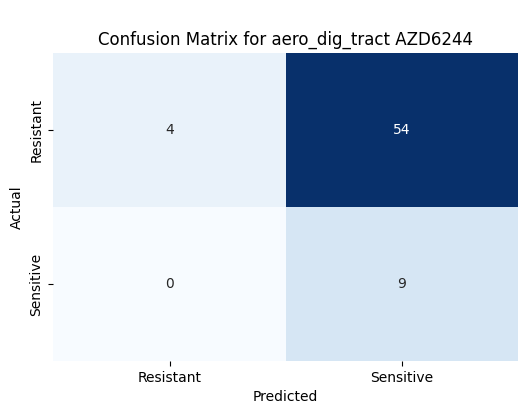

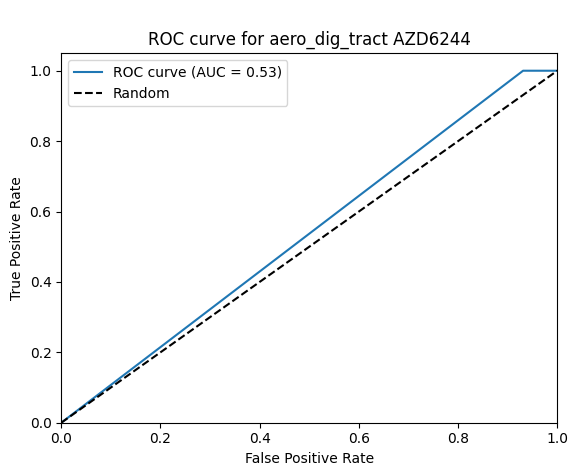

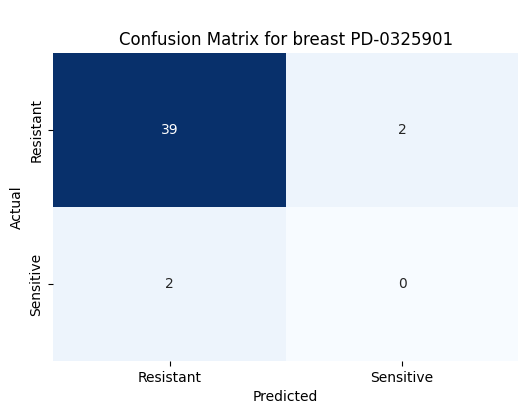

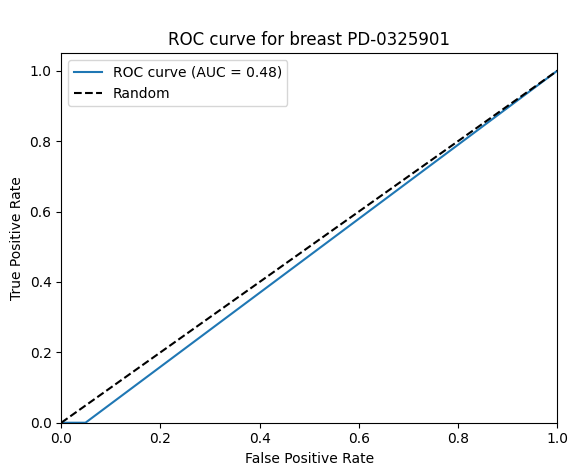

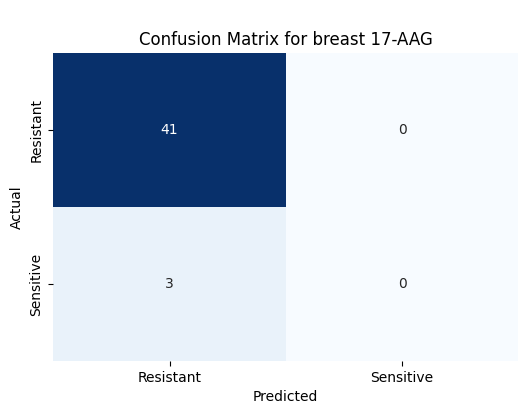

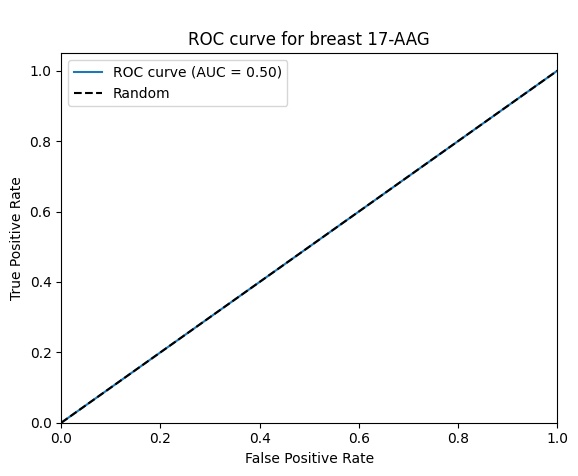

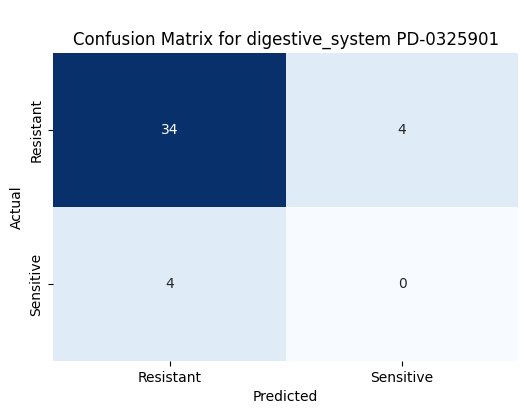

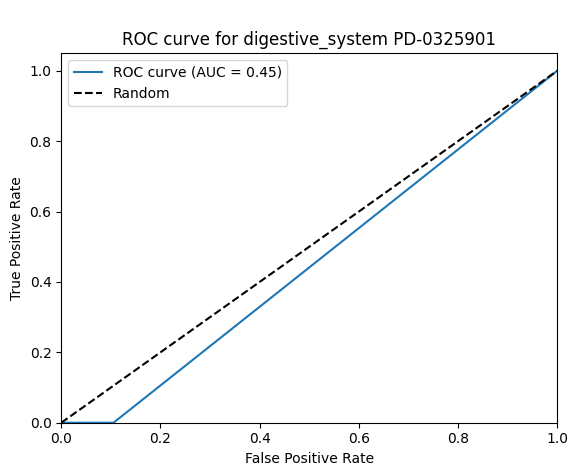

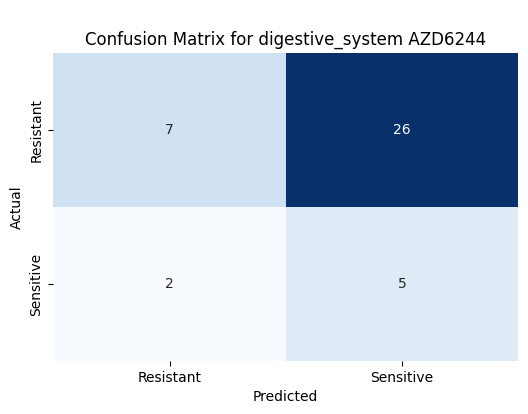

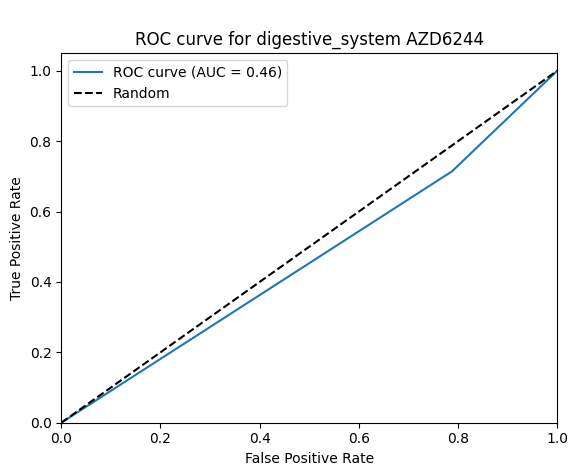

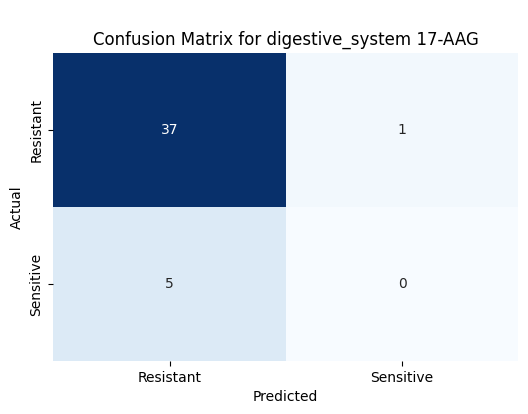

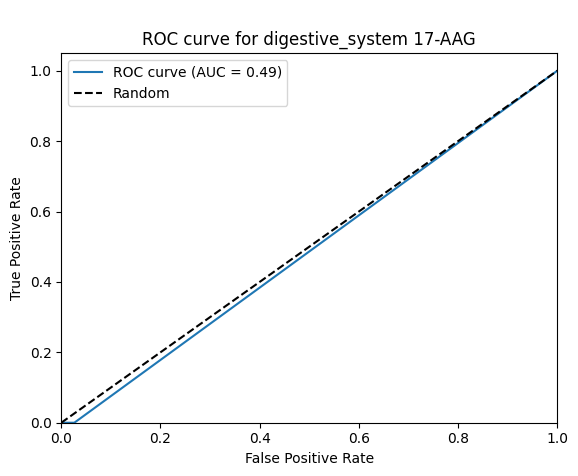

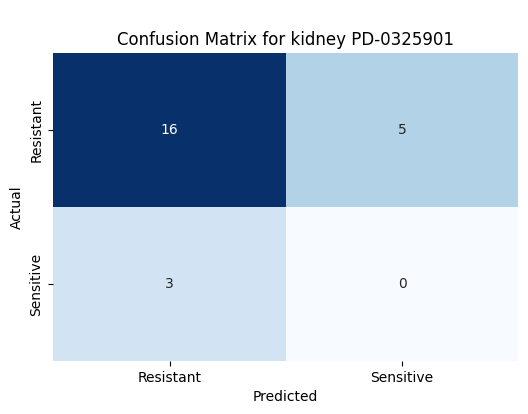

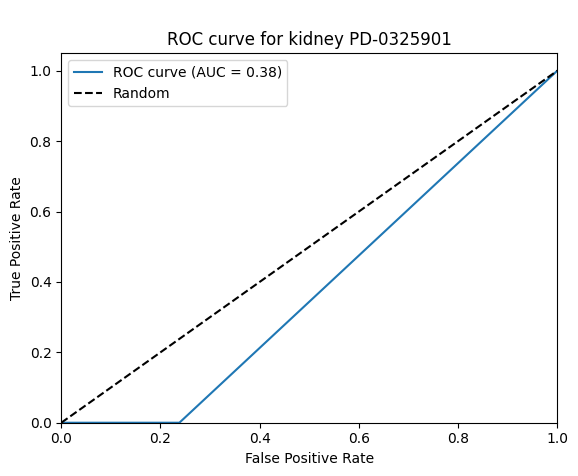

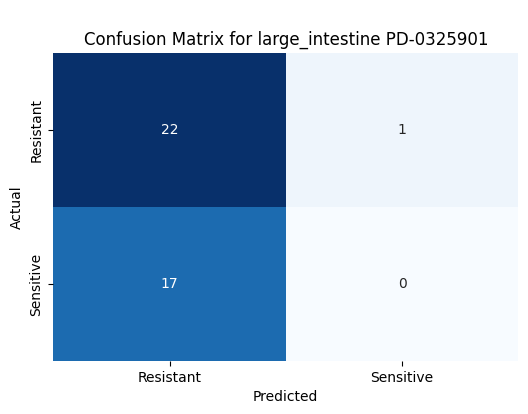

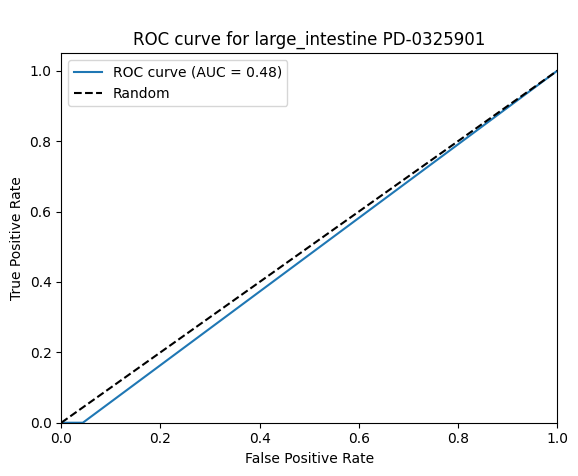

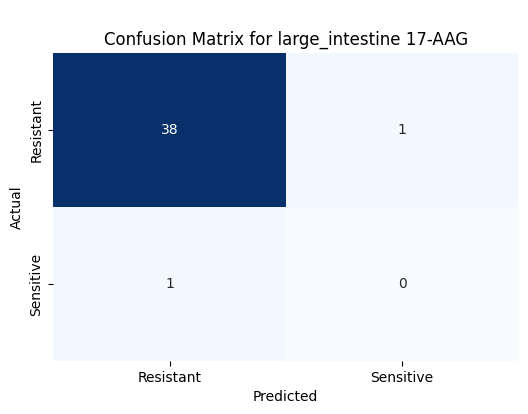

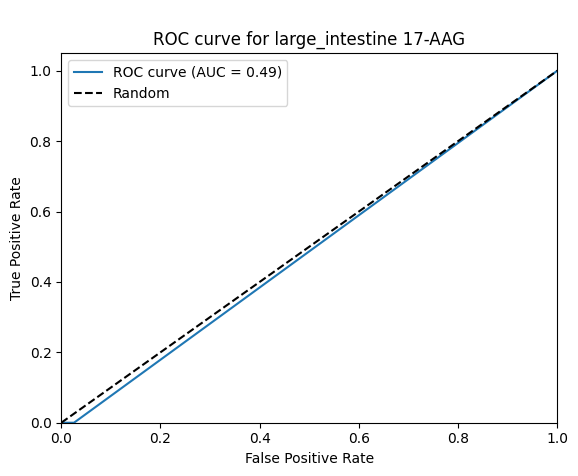

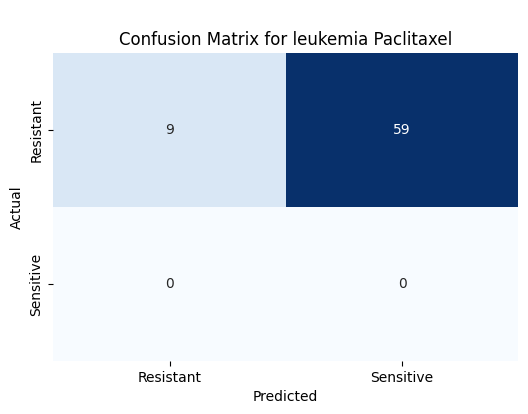

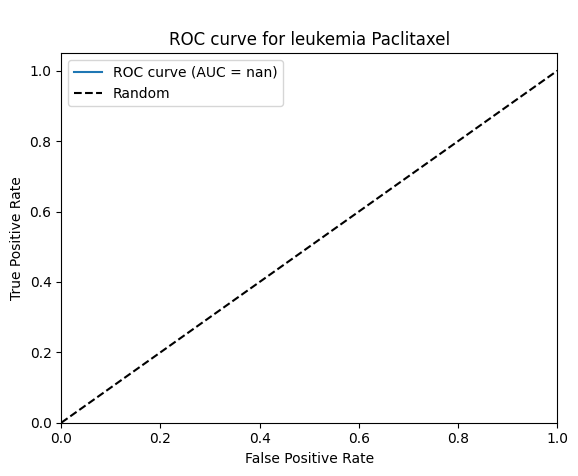

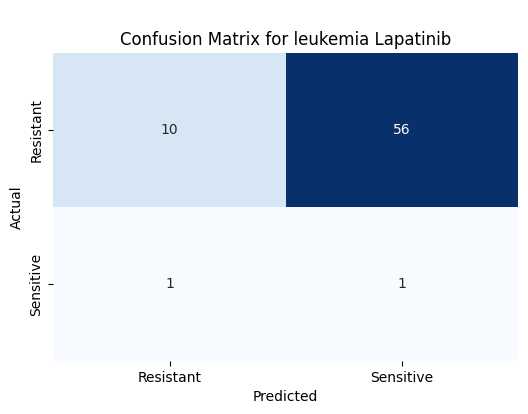

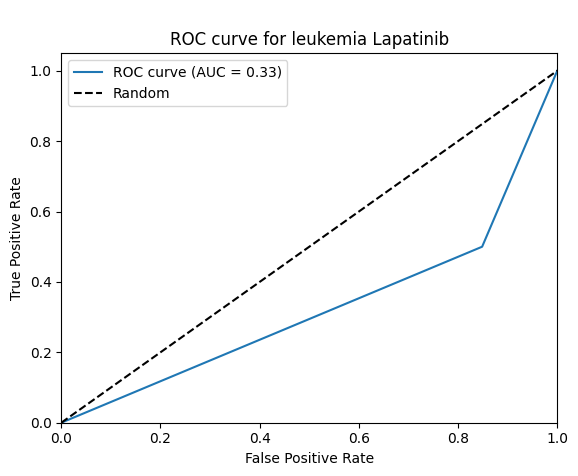

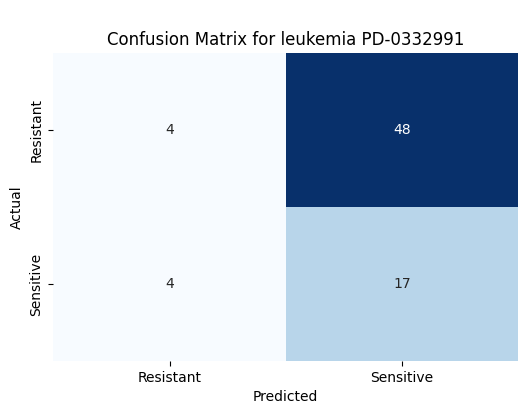

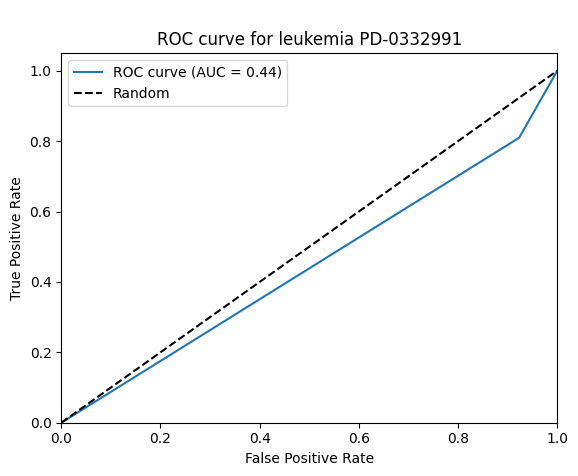

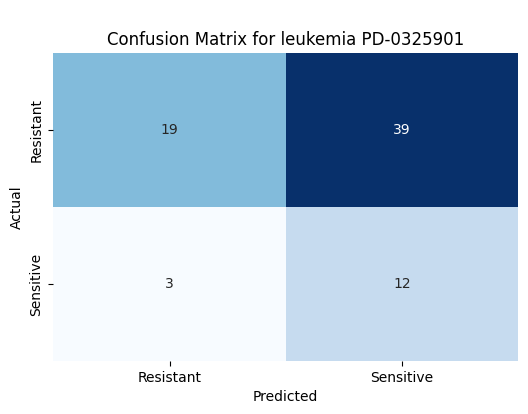

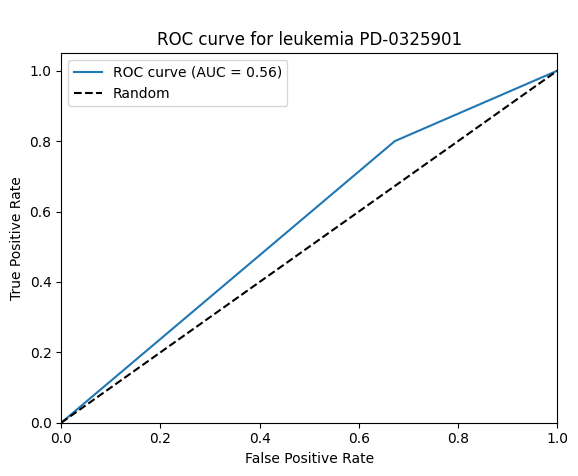

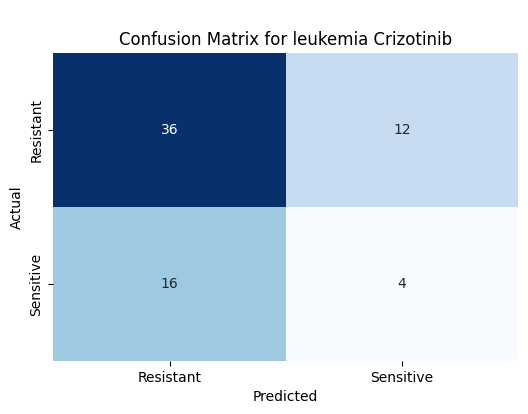

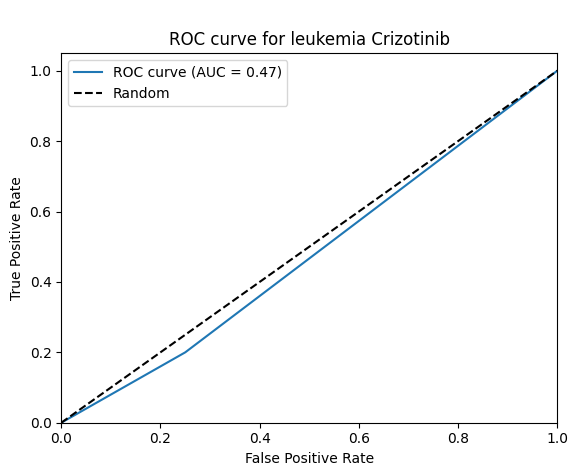

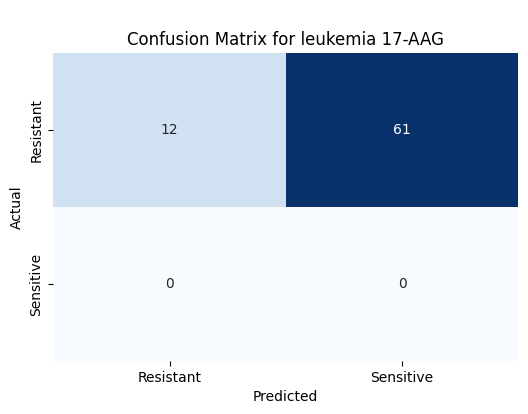

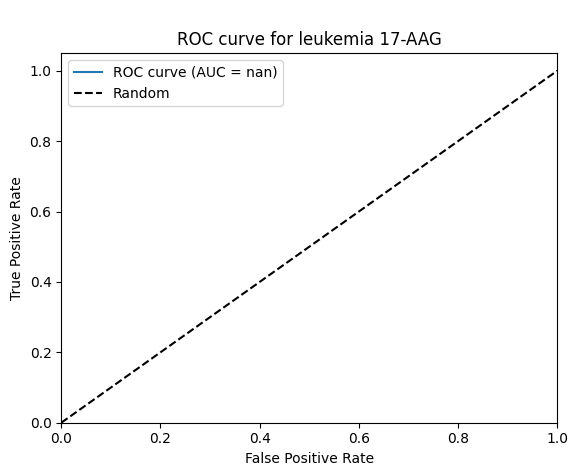

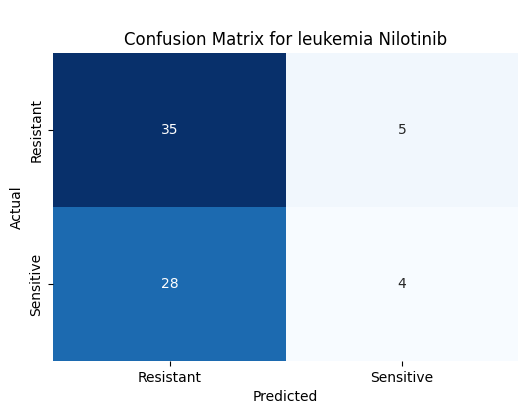

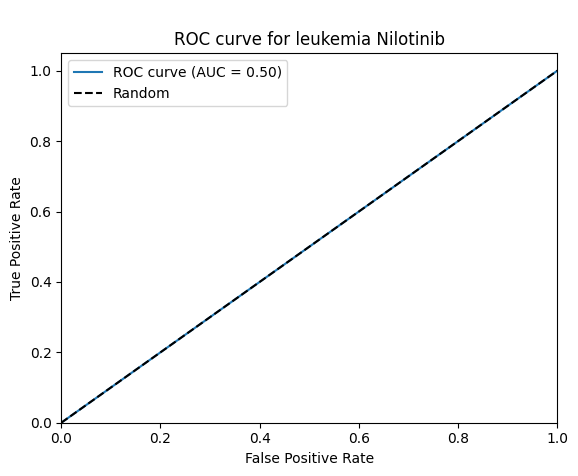

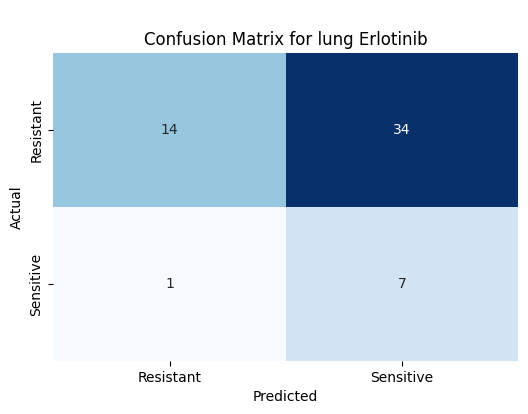

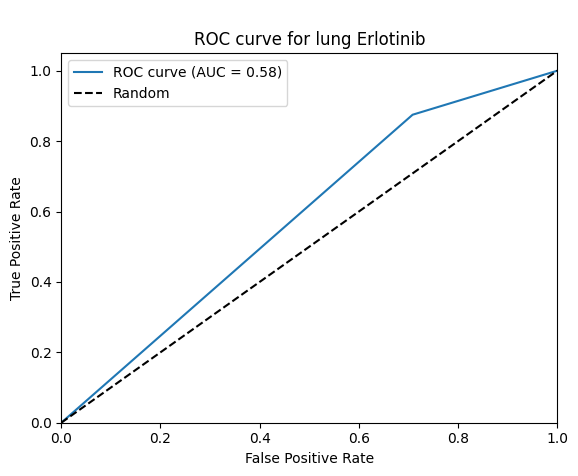

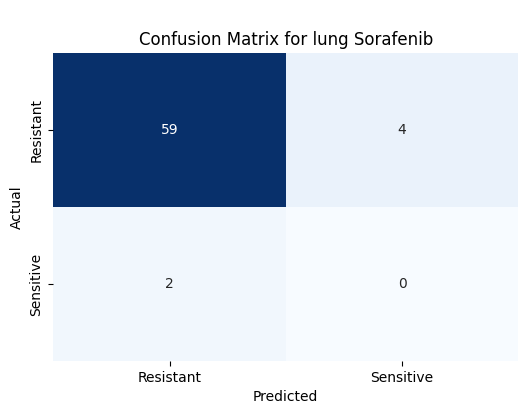

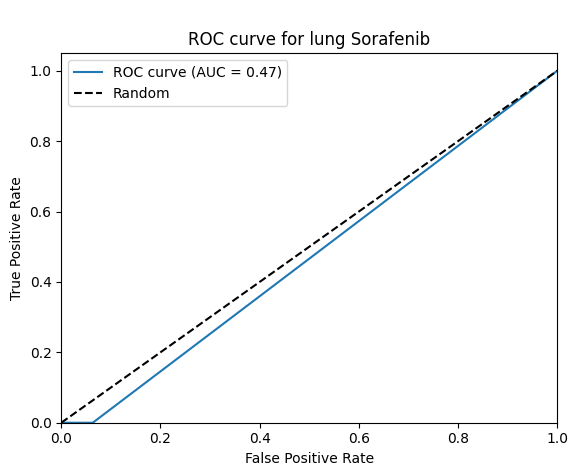

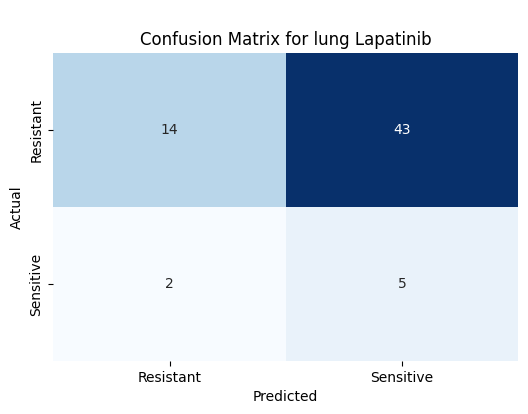

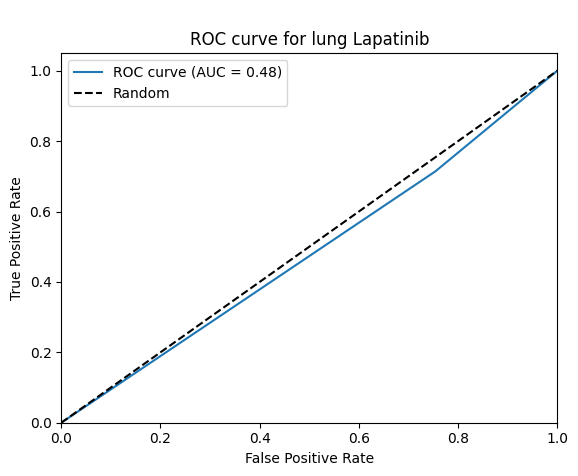

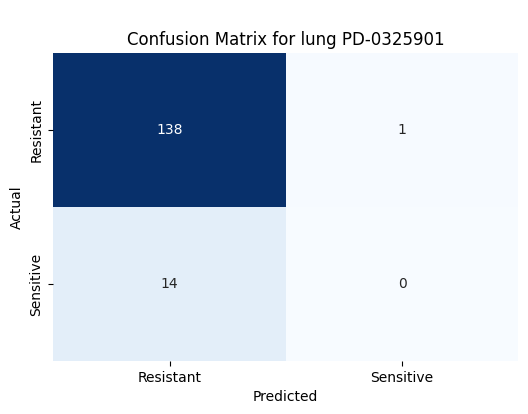

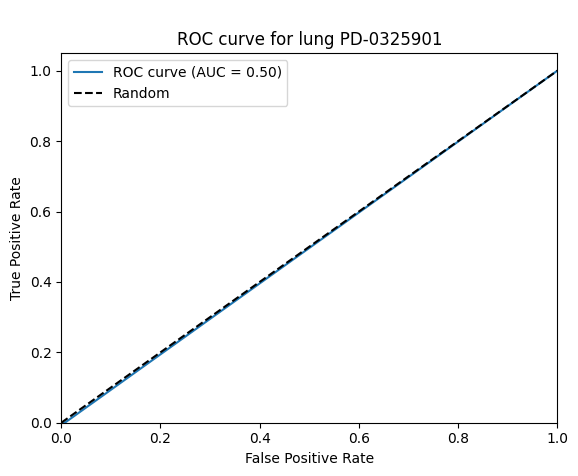

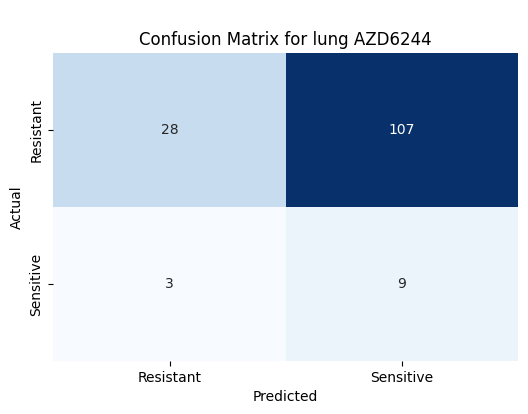

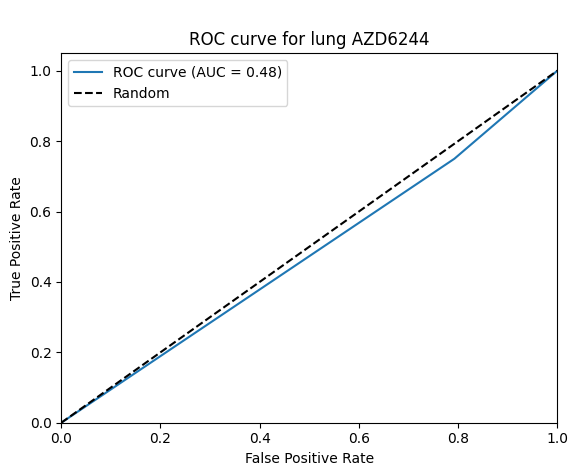

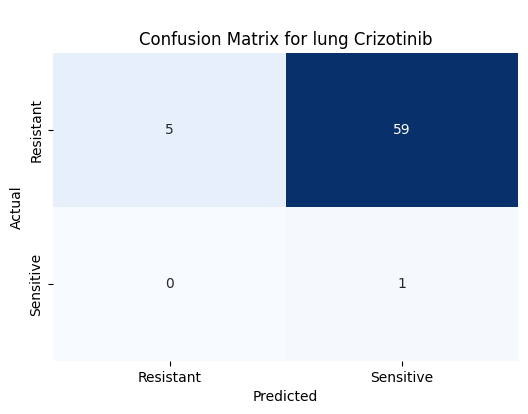

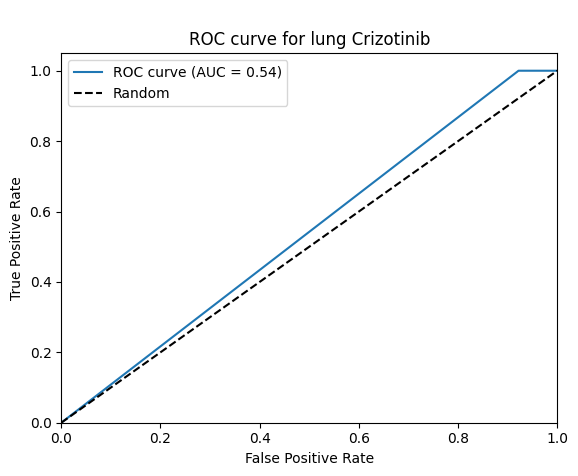

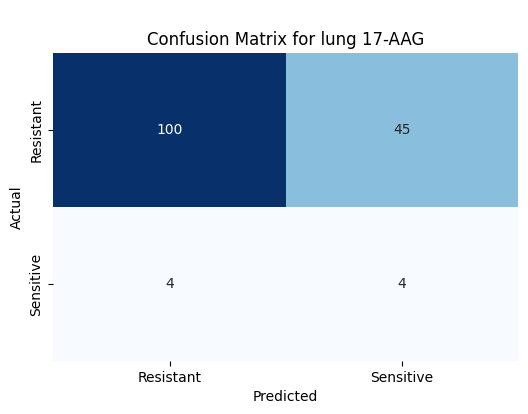

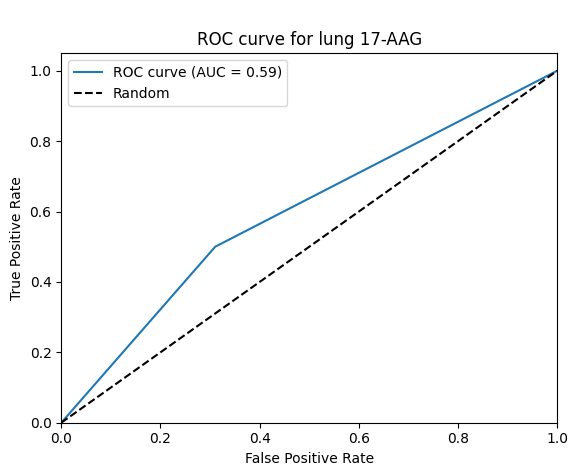

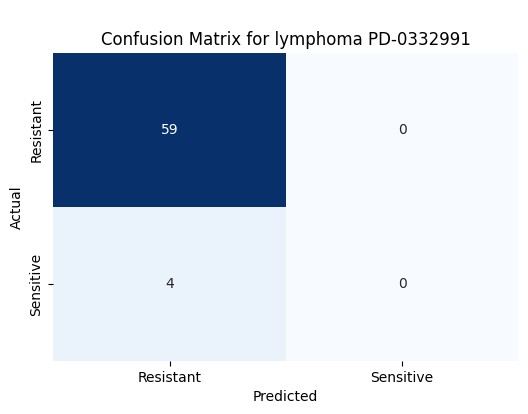

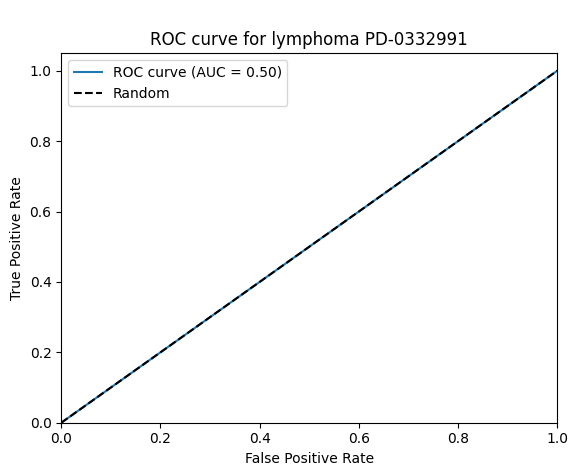

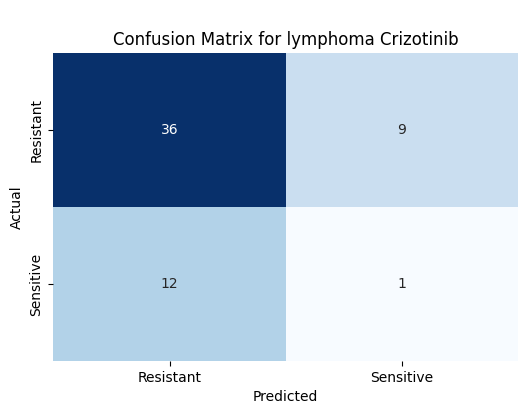

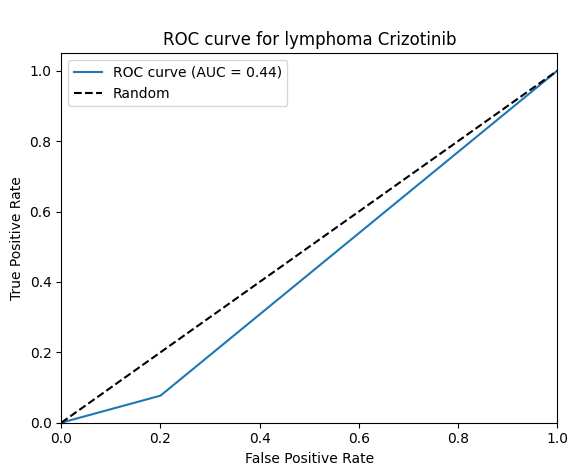

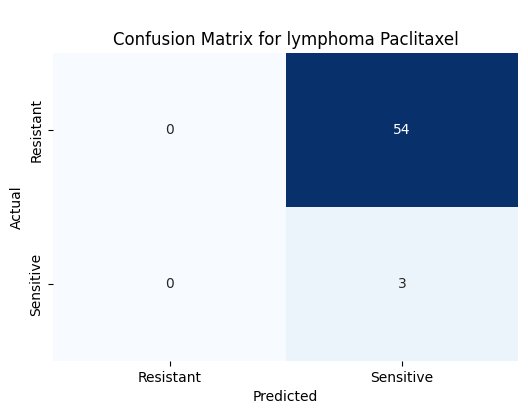

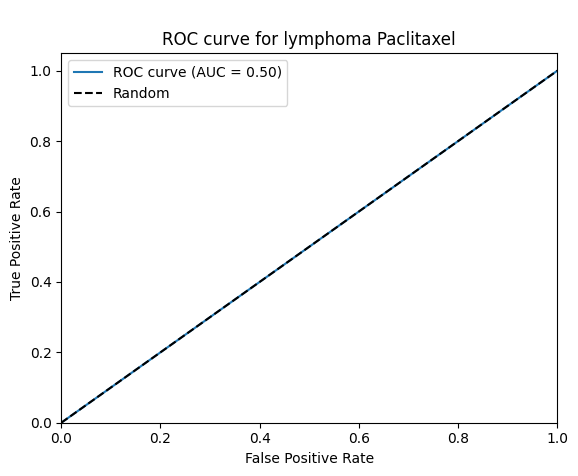

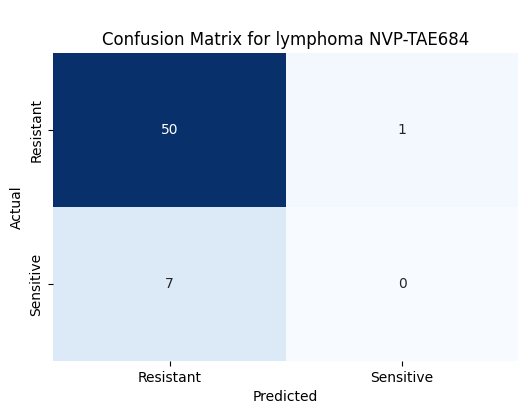

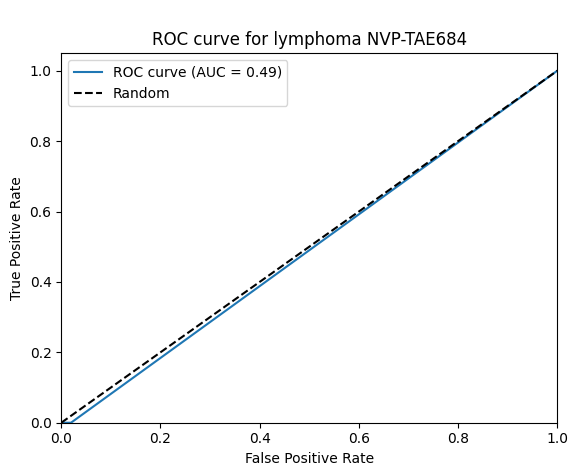

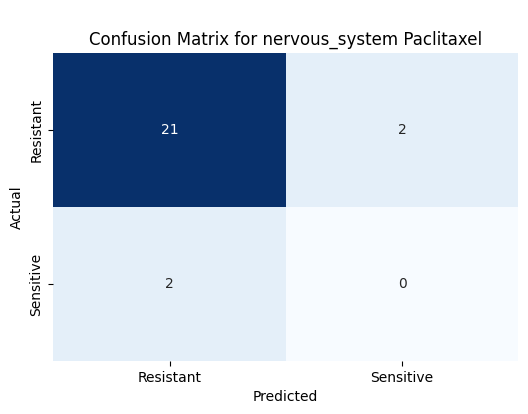

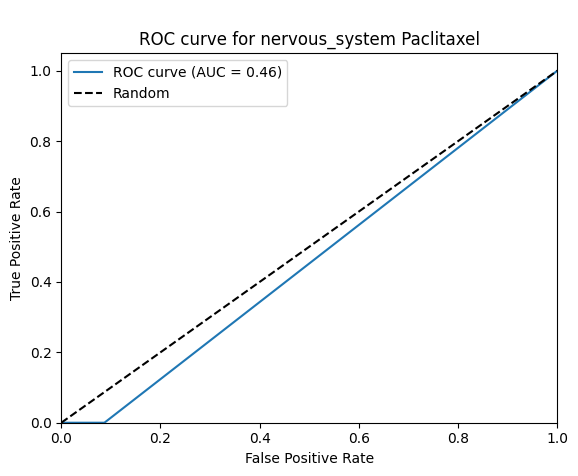

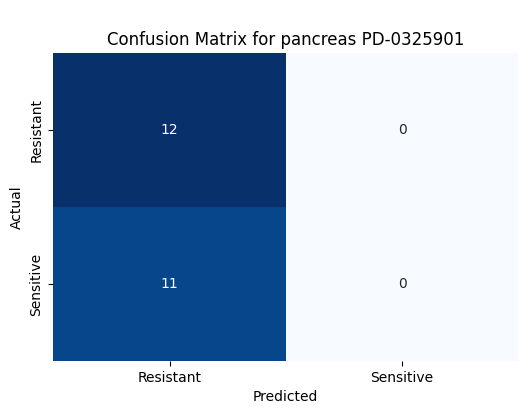

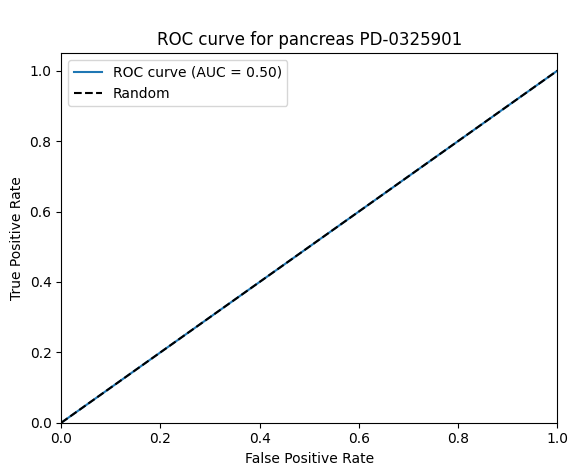

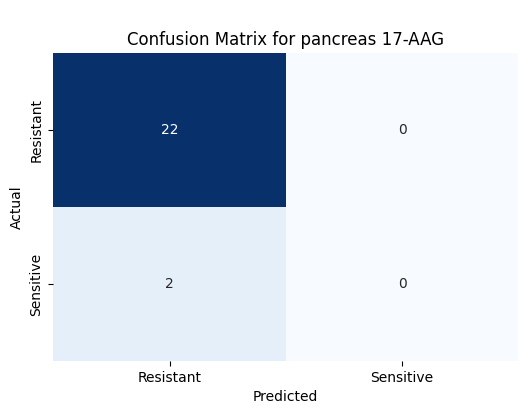

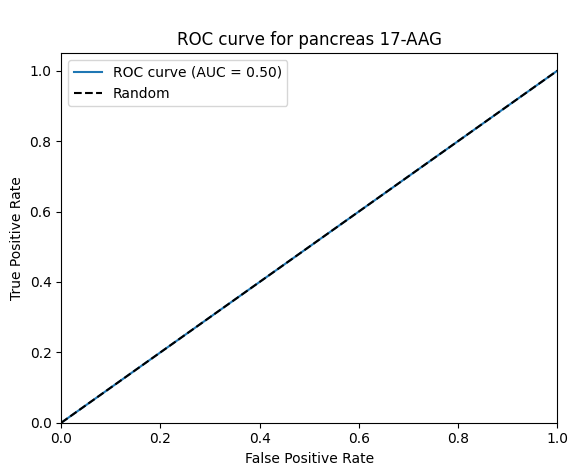

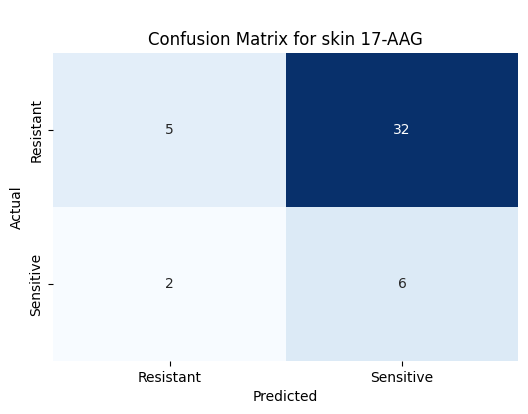

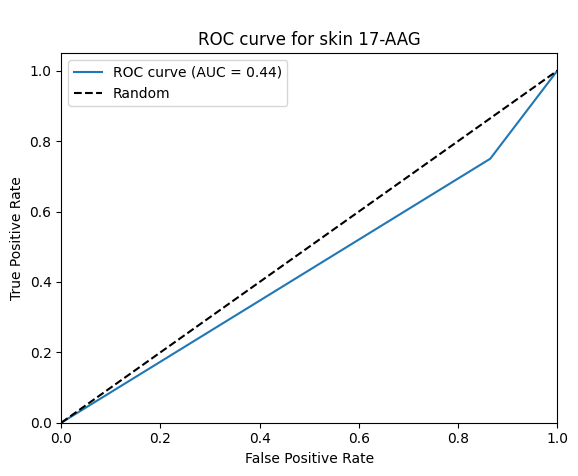

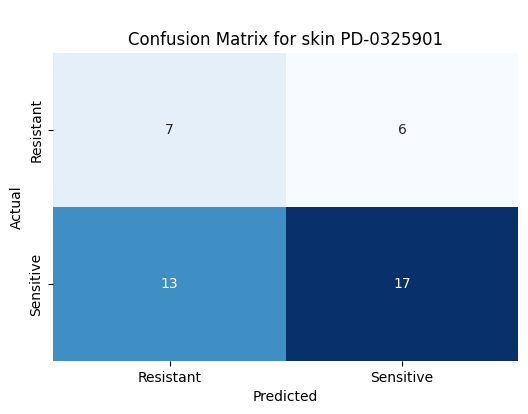

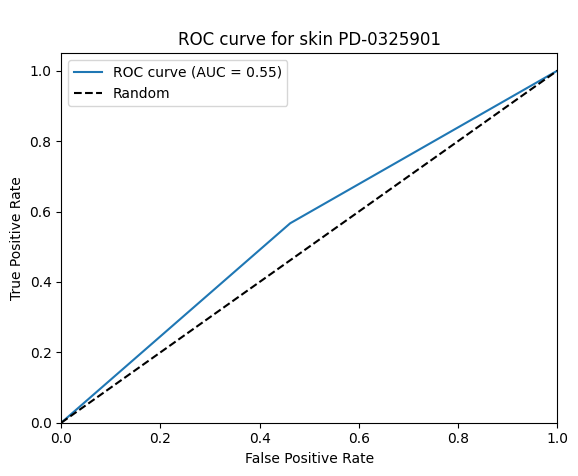

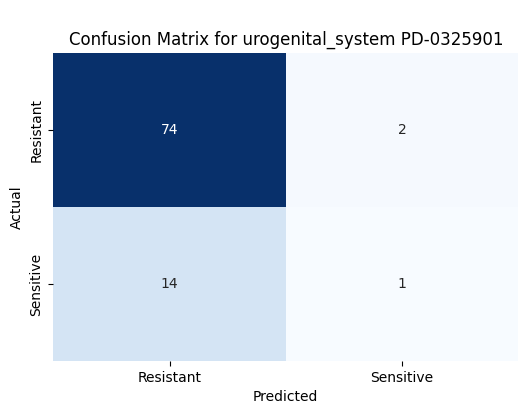

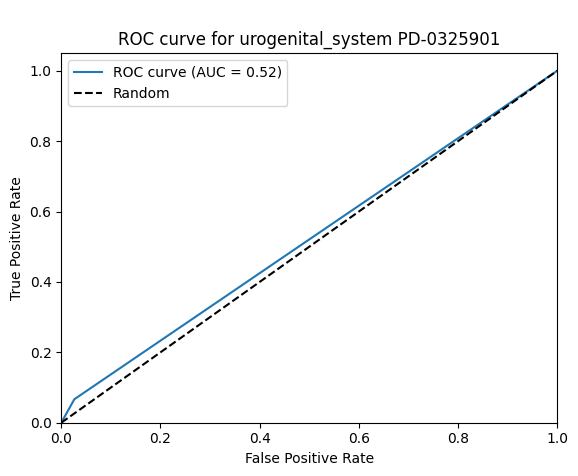

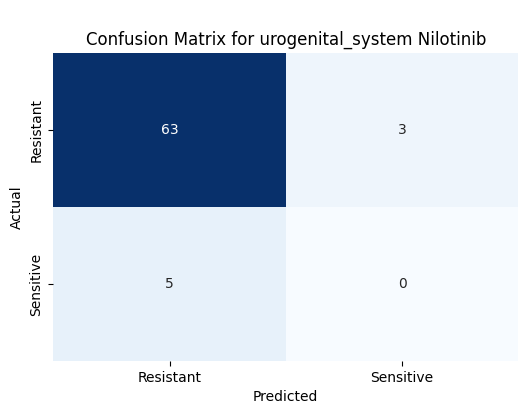

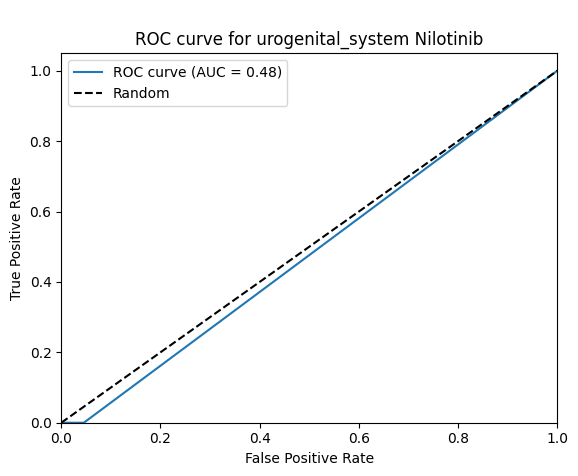

In [19]:
All_drugs_for_one_histology = dict()

for histology in histologies:
    
    one_drug = dict()
    os.chdir(os.path.join(output_dir_ccle,histology))
    drugs_for_histology_ccle = [item1 for item1 in os.listdir() if os.path.isdir(item1)]
    os.chdir(os.path.join(output_dir_gdsc,histology))
    drugs_for_histology_gdsc = os.listdir()
    if len(drugs_for_histology_ccle) > 0 and len(drugs_for_histology_gdsc) > 0:
        commom_drug_ccle_gdsc = set(drugs_for_histology_ccle).intersection(drugs_for_histology_gdsc)
        if len(commom_drug_ccle_gdsc) > 0:
            for drug in commom_drug_ccle_gdsc:
                os.chdir(os.path.join(output_dir_ccle,histology,drug))
                if len(os.listdir()) > 1:
                    boruta_drug_data_ccle = pd.read_csv(os.path.join(output_dir_ccle,histology,drug,drug+" "+histology+" "+"- Expression Data(IC50).tsv"), sep = ",")
                    boruta_drug_data_ccle['log IC50 (uM)'].replace('S',1, inplace = True)
                    boruta_drug_data_ccle['log IC50 (uM)'].replace('R',0, inplace = True)
                    os.chdir(os.path.join(output_dir_gdsc,histology,drug))
                    if len(os.listdir()) > 0:
                        
                        boruta_drug_data_gdsc = pd.read_csv(os.path.join(output_dir_gdsc,histology,drug,drug+" "+histology+" "+"- GDSC Histology Project.tsv"), sep = "\t")
                        boruta_drug_data_gdsc[drug].replace('S',1, inplace = True)
                        boruta_drug_data_gdsc[drug].replace('R',0, inplace = True)
                        if len(boruta_drug_data_ccle.columns) > 3 and len(boruta_drug_data_gdsc.columns) > 4:
                            
                            x_ccle = boruta_drug_data_ccle.drop(['Unnamed: 0', 'Cell Line', 'log IC50 (uM)'], axis=1)
                            x_gdsc = boruta_drug_data_gdsc.drop(['Cell Line', 'GDSC\nTissue descriptor 1', 'GDSC\nTissue\ndescriptor 2', drug], axis=1)
                            commom_feature_ccle_gdsc = set(x_ccle.columns).intersection(x_gdsc.columns)
                            if len(commom_feature_ccle_gdsc) > 0:
                                print(histology)
                                print(drug)
                                
                                features_name = commom_feature_ccle_gdsc
                                sample_number_train_ccle_drug = len(boruta_drug_data_ccle['Cell Line'])
                                sample_number_test_gdsc_drug = len(boruta_drug_data_gdsc['Cell Line'])
                                x_ccle = x_ccle[list(commom_feature_ccle_gdsc)]
                                y_ccle = boruta_drug_data_ccle['log IC50 (uM)']
                                
                                x_gdsc = x_gdsc[list(commom_feature_ccle_gdsc)]
                                y_gdsc = boruta_drug_data_gdsc[drug]
                                
                                features_name_number= len((x_gdsc).columns)
                                
                                x_ccle = np.array(x_ccle)
                                y_ccle = np.array(y_ccle)
                                x_gdsc = np.array(x_gdsc)
                                y_gdsc = np.array(y_gdsc)
                                
                                
                                
                                # MODEL OLUŞTURUYORUZ
                                model = XGBClassifier(n_estimators=100, max_depth=3, random_state=1)
                                
                                # k-fold kullanılıyor.
                                kfold = KFold(n_splits=5, random_state=1, shuffle = True)
                            
                                scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
                                cv_results = cross_validate(model, x_ccle, y_ccle, cv=kfold, scoring=scoring)
                            
                                average_scores = {score: cv_results['test_'+score].mean() for score in scoring}
                                best_score_criteria = max(average_scores, key=average_scores.get)
                                best_model_index = np.argmax(cv_results['test_'+best_score_criteria])
                                best_model = model
                                best_model.fit(x_ccle, y_ccle)
                                
                                # Tahmin yapılıyor.
                                y_gdsc_pred = best_model.predict(x_gdsc)

                            
                                avg_accuracy = cv_results['test_accuracy'].mean()
                                avg_precision = cv_results['test_precision_macro'].mean()
                                avg_recall = cv_results['test_recall_macro'].mean()
                                avg_f1 = cv_results['test_f1_macro'].mean()
                            
                            
                                tn, fp, fn, tp = confusion_matrix(y_gdsc, y_gdsc_pred).ravel()
                                TN_value = tn
                                FP_value = fp
                                FN_value = fn
                                TP_value = tp
                                
                                class_labels = ['Resistant', 'Sensitive']

                                # Calculate the confusion matrix
                                confusion = confusion_matrix(y_gdsc, y_gdsc_pred)

                                # Create a DataFrame for the confusion matrix
                                confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)


                                # Create a heatmap for visualisation
                                plt.figure(figsize=(6, 4))
                                sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d', cbar=False)
                                plt.xlabel('Predicted')
                                plt.ylabel('Actual')
                                plt.title(f'\nConfusion Matrix for {histology} {drug}')
                                os.makedirs(os.path.join(output_dir_gdsc, histology, drug, "Result"))
                                os.chdir(os.path.join(output_dir_gdsc,histology,drug,"Result"))
                                plt.savefig('Confusion Matrix.png', bbox_inches='tight')
                            
                            
                            
                            
                                fpr, tpr, thresholds = roc_curve(y_gdsc, y_gdsc_pred) 
                                roc_auc = auc(fpr, tpr)
                                # Plot the ROC curve
                                plt.figure()  
                                plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
                                plt.plot([0, 1], [0, 1], 'k--', label='Random')
                                plt.xlim([0.0, 1.0])
                                plt.ylim([0.0, 1.05])
                                plt.xlabel('False Positive Rate')
                                plt.ylabel('True Positive Rate')
                                plt.title(f'\nROC curve for {histology} {drug}')
                                plt.legend()
                                os.chdir(os.path.join(output_dir_gdsc,histology,drug,"Result"))
                                plt.savefig('ROC Curve.png')
                            
                            
                    
                                result_table_drug = pd.DataFrame({
                                'Histology': [histology],
                                'Drug': [drug],
                                'Number of Sample-Train Data (CCLE)': [sample_number_train_ccle_drug],
                                'Number of Sample-Test Data (GDSC) ': [sample_number_test_gdsc_drug],
                                'Number of Feature': [features_name_number],
                                'Name of Features': [features_name],
                                'TPs (True Positives)': [TP_value],
                                'TNs (True Negatives)': [TN_value],
                                'FPs (False Positives)': [FP_value],
                                'FNs (False Negatives)': [FN_value],
                                'Precision': [avg_precision],
                                'Recall': [avg_recall],
                                'F1 Score': [avg_f1],
                                'Accuracy': [avg_accuracy],
                                'AUC': [roc_auc]   
                                 })
                                one_drug[drug] = result_table_drug
                                print(one_drug[drug])
                                
                                
    if one_drug:
        All_drugs_for_one_histology[histology] = pd.concat(one_drug)
                            
                            
    
if All_drugs_for_one_histology:
    All_histologies_drugs_result = pd.concat(All_drugs_for_one_histology)





In [20]:
All_histologies_drugs_result_new = All_histologies_drugs_result.sort_values(by='AUC', ascending=False)

In [22]:
All_histologies_drugs_result_new.to_excel(os.path.join(output_dir_gdsc, "All RESULT .xlsx"), index=False)